## PROBLEM STATEMENT
In the telecom industry, customers are able to choose from multiple service providers and actively switch
from one operator to another. In this highly competitive market, the telecommunications industry
experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to
acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.


## BUSINESS GOAL
- Predict what all factors affect customers being at high risk of churn.

## ANALYSIS APPROACH
- Reading and understanding data
- Handling missing values for categorical and continous features
- dropping unwanted features
- EDA 
- Data preperation: deriving atleast two features, filtering high value customers based on 70th percentile of avg recharge amnt
- deleting 9th month features (churn phase)
- deriving churn
- Data model 1: Logistic regression without PCA (handling data imbalance on train data using SMOTE)
- Data model 2: Logistic regression with PCA (using balanced data)
- Data model 3: Decision trees with PCA (using balanced data)
- Data model 4: Random Forest with PCA (using balanced data)
- Recommendation Of features that needs to be considered


### Reading and Understanding dataset

In [1]:
#---------- importing required librarires for initial analysis ---------- 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#---------- display options ---------- 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.options.display.float_format='{:.4f}'.format

sns.set_style("whitegrid")

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16

#---------- filtering warnings ---------- 

import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the dataset to the dataframe 'telecom'

telecom = pd.read_csv("telecom_churn_data.csv")

In [3]:
#checking for first few rows

telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109          0.0000          0.0000          0.0000   
1     7001865778        109          0.0000          0.0000          0.0000   
2     7001625959        109          0.0000          0.0000          0.0000   
3     7001204172        109          0.0000          0.0000          0.0000   
4     7000142493        109          0.0000          0.0000          0.0000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014 197.3850 214.8160 213.8030  21.1000          nan   
1            9/30/2014  34.0470 355.0740 268.3210  86.2850      24.1100   
2            9/30/2014 167.6900 189.0580 210.2260 290.7140      11.5400   
3            9/30/2014 221.3380 251.1020 508.0540 389.5000      99.9100   
4            9/30/2014 261.6360 309.8760 238.1740 163.4260      50.3100   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan       0.0000          nan           nan           nan   
1      78.6800       7.6800      18.3400       15.7400       99.8400   
2      55.2400      37.2600      74.8100      143.3300      220.5900   
3      54.3900     310.9800     241.7100      123.3100      109.0100   
4     149.4400      83.8900      58.7800       76.9600       91.8800   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0        0.0000           nan            nan            nan         0.0000   
1      304.7600       53.7600         0.0000         0.0000         0.0000   
2      208.3600      118.9100         0.0000         0.0000         0.0000   
3       71.6800      113.5400         0.0000        54.8600        44.3800   
4      124.2600       45.8100         0.0000         0.0000         0.0000   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan         0.0000            nan   
1         0.0000         0.0000         0.0000         0.0000         0.0000   
2        38.4900         0.0000         0.0000         0.0000        70.9400   
3         0.0000         0.0000        28.0900        39.0400         0.0000   
4         0.0000         0.0000         0.0000         0.0000         0.0000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan            0.0000               nan   
1           23.8800           74.5600            7.6800           18.3400   
2            7.1900           28.7400           13.5800           14.3900   
3           73.6800           34.8100           10.6100           15.4900   
4           50.3100          149.4400           83.8900           58.7800   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan            0.0000               nan   
1           11.5100           75.9400          291.8600           53.7600   
2           29.3400           16.8600           38.4600           28.1600   
3          107.4300           83.2100           22.4600           65.4600   
4           67.6400           91.8800          124.2600           37.8900   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan            0.0000               nan   
1            0.0000            0.0000            0.0000            0.0000   
2           24.1100           21.7900           15.6100           22.2400   
3            1.9100            0.6500            4.

**`Here, it can be noticed that, there are three phases of customer behaviour cycle`**

1. Good phase i.e. 6th and 7th month
2. Action phase i.e. 8th month
3. Churn phase i.e. 9th month

In [4]:
#checking the number of rows and columns

print("\033[1mNo of (rows, columns) in the dataframe: \033[0m", telecom.shape)

No of (rows, columns) in the dataframe:  (99999, 226)


In [5]:
#dataframe summary

telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
#statistical summary of numerical columns

telecom.describe(include='all')

#by inspecting the statisical summary, some columns are found to have missing values and outliers
#these will be inspected more later.

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count       99999.0000 99999.0000      98981.0000      98981.0000   
unique             nan        nan             nan             nan   
top                nan        nan             nan             nan   
freq               nan        nan             nan             nan   
mean   7001207270.3875   109.0000          0.0000          0.0000   
std        695669.3863     0.0000          0.0000          0.0000   
min    7000000074.0000   109.0000          0.0000          0.0000   
25%    7000606232.5000   109.0000          0.0000          0.0000   
50%    7001204632.0000   109.0000          0.0000          0.0000   
75%    7001812030.5000   109.0000          0.0000          0.0000   
max    7002410905.0000   109.0000          0.0000          0.0000   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count       98981.0000                99999                99398   
unique             nan                    1                    1   
top                nan            6/30/2014            7/31/2014   
freq               nan                99999                99398   
mean            0.0000                  NaN                  NaN   
std             0.0000                  NaN                  NaN   
min             0.0000                  NaN                  NaN   
25%             0.0000                  NaN                  NaN   
50%             0.0000                  NaN                  NaN   
75%             0.0000                  NaN                  NaN   
max             0.0000                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9     arpu_6     arpu_7  \
count                 98899                98340 99999.0000 99999.0000   
unique                    1                    1        nan        nan   
top               8/31/2014            9/30/2014        nan        nan   
freq                  98899                98340        nan        nan   
mean                    NaN                  NaN   282.9874   278.5366   
std                     NaN                  NaN   328.4398   338.1563   
min                     NaN                  NaN -2258.7090 -2014.0450   
25%                     NaN                  NaN    93.4115    86.9805   
50%                     NaN                  NaN   197.7040   191.6400   
75%                     NaN                  NaN   371.0600   365.3445   
max                     NaN                  NaN 27731.0880 35145.8340   

           arpu_8     arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count  99999.0000 99999.0000   96062.0000   96140.0000   94621.0000   
unique        nan        nan          nan          nan          nan   
top           nan        nan          nan          nan          nan   
freq          nan        nan          nan          nan          nan   
mean     279.1547   261.6451     132.3959     133.6708     133.0181   
std      344.4748   341.9986     297.2074     308.7941     308.9516   
min     -945.8080 -1899.5050       0.0000       0.0000       0.0000   
25%       84.1260    62.6850       7.3800       6.6600       6.4600   
50%      192.0800   176.8490      34.3100      32.3300      32.3600   
75%      369.3705   353.4665     118.7400     115.5950     115.8600   
max    33543.6240 38805.6170    7376.7100    8157.7800   10752.5600   

        onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count    92254.0000    96062.0000    96140.0000    94621.0000    92254.0000   
unique          nan           nan           nan           nan           nan   
top             nan           nan           nan           nan           nan   
freq            nan           nan           nan           nan           nan   
mean       130.3023      197.9356      197.0451      196.5748      190.3372   
std        308.4777      316.8516      325.8628      327.1707      319.3961   
min          0.0000        0.0000        0.0000        0.0000       

In [7]:
#checking for duplicate values

telecom[telecom.duplicated(keep = False)]

#none found

Empty DataFrame
Columns: [mobile_number, circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9, arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2t_mou_9, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2m_mou_9, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2f_mou_9, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2t_mou_9, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2m_mou_9, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2f_mou_9, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2t_mou_9, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2m_mou_9, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, ...]
Index: []

In [8]:
#checking for column wise null values

nan_perc = 100*(telecom.isnull().sum()/len(telecom))


In [9]:
#displaying columns with LESS % missing values

nan_perc[(nan_perc > 0 )& (nan_perc < 30)] 

loc_og_t2o_mou         1.0180
std_og_t2o_mou         1.0180
loc_ic_t2o_mou         1.0180
last_date_of_month_7   0.6010
last_date_of_month_8   1.1000
last_date_of_month_9   1.6590
onnet_mou_6            3.9370
onnet_mou_7            3.8590
onnet_mou_8            5.3781
onnet_mou_9            7.7451
offnet_mou_6           3.9370
offnet_mou_7           3.8590
offnet_mou_8           5.3781
offnet_mou_9           7.7451
roam_ic_mou_6          3.9370
roam_ic_mou_7          3.8590
roam_ic_mou_8          5.3781
roam_ic_mou_9          7.7451
roam_og_mou_6          3.9370
roam_og_mou_7          3.8590
roam_og_mou_8          5.3781
roam_og_mou_9          7.7451
loc_og_t2t_mou_6       3.9370
loc_og_t2t_mou_7       3.8590
loc_og_t2t_mou_8       5.3781
loc_og_t2t_mou_9       7.7451
loc_og_t2m_mou_6       3.9370
loc_og_t2m_mou_7       3.8590
loc_og_t2m_mou_8       5.3781
loc_og_t2m_mou_9       7.7451
loc_og_t2f_mou_6       3.9370
loc_og_t2f_mou_7       3.8590
loc_og_t2f_mou_8       5.3781
loc_og_t2f

#### IMPUTING MISSING VALUES --> columns with below 10% null

In [10]:
#retrieving list of columns of type 'object'

obj_cols = telecom.select_dtypes(include ='object').columns

obj_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [11]:
#filling missing values of categorical columns with mode

telecom[obj_cols] = telecom[obj_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [12]:
#checking for column wise null values again

nan_perc = 100*(telecom.isnull().sum()/len(telecom))

#displaying columns with LESS % missing values

less_null = nan_perc[(nan_perc > 0 )& (nan_perc < 30)] 

less_null

loc_og_t2o_mou     1.0180
std_og_t2o_mou     1.0180
loc_ic_t2o_mou     1.0180
onnet_mou_6        3.9370
onnet_mou_7        3.8590
onnet_mou_8        5.3781
onnet_mou_9        7.7451
offnet_mou_6       3.9370
offnet_mou_7       3.8590
offnet_mou_8       5.3781
offnet_mou_9       7.7451
roam_ic_mou_6      3.9370
roam_ic_mou_7      3.8590
roam_ic_mou_8      5.3781
roam_ic_mou_9      7.7451
roam_og_mou_6      3.9370
roam_og_mou_7      3.8590
roam_og_mou_8      5.3781
roam_og_mou_9      7.7451
loc_og_t2t_mou_6   3.9370
loc_og_t2t_mou_7   3.8590
loc_og_t2t_mou_8   5.3781
loc_og_t2t_mou_9   7.7451
loc_og_t2m_mou_6   3.9370
loc_og_t2m_mou_7   3.8590
loc_og_t2m_mou_8   5.3781
loc_og_t2m_mou_9   7.7451
loc_og_t2f_mou_6   3.9370
loc_og_t2f_mou_7   3.8590
loc_og_t2f_mou_8   5.3781
loc_og_t2f_mou_9   7.7451
loc_og_t2c_mou_6   3.9370
loc_og_t2c_mou_7   3.8590
loc_og_t2c_mou_8   5.3781
loc_og_t2c_mou_9   7.7451
loc_og_mou_6       3.9370
loc_og_mou_7       3.8590
loc_og_mou_8       5.3781
loc_og_mou_9

In [13]:
#imputing with 0 since mean values have considered outliers, and median could change in future.

telecom[less_null.index] = telecom[less_null.index].fillna(0)

#### REMOVING COLUMNS WITH HIGHER % MISSING VALUES

In [14]:
#displaying columns with more than 45% missing values

null_45 = nan_perc[nan_perc > 45]

null_45

total_rech_data_6    74.8467
total_rech_data_7    74.4287
total_rech_data_8    73.6607
total_rech_data_9    74.0777
max_rech_data_6      74.8467
max_rech_data_7      74.4287
max_rech_data_8      73.6607
max_rech_data_9      74.0777
count_rech_2g_6      74.8467
count_rech_2g_7      74.4287
count_rech_2g_8      73.6607
count_rech_2g_9      74.0777
count_rech_3g_6      74.8467
count_rech_3g_7      74.4287
count_rech_3g_8      73.6607
count_rech_3g_9      74.0777
av_rech_amt_data_6   74.8467
av_rech_amt_data_7   74.4287
av_rech_amt_data_8   73.6607
av_rech_amt_data_9   74.0777
arpu_3g_6            74.8467
arpu_3g_7            74.4287
arpu_3g_8            73.6607
arpu_3g_9            74.0777
arpu_2g_6            74.8467
arpu_2g_7            74.4287
arpu_2g_8            73.6607
arpu_2g_9            74.0777
night_pck_user_6     74.8467
night_pck_user_7     74.4287
night_pck_user_8     73.6607
night_pck_user_9     74.0777
fb_user_6            74.8467
fb_user_7            74.4287
fb_user_8     

In [15]:
# Here we need columns with recharge information

fill_recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 
                      'max_rech_data_7','max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 
                      'av_rech_amt_data_8','av_rech_amt_data_9']

# so let us impute those columns with 0 which indicates that there is no record of recharge for that particular month

telecom[fill_recharge_cols] = telecom[fill_recharge_cols].fillna(0)

In [16]:
#night_pack cols and fb_user cols are in a way categorical columns with values 0 and 1. lets impute missing values with -1;
#there by creating a new category

fill_categorical = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8','night_pck_user_9','fb_user_6', 'fb_user_7',
                   'fb_user_8', 'fb_user_9']

telecom[fill_categorical] = telecom[fill_categorical].fillna(-1)

In [17]:
#checking for column wise null values again

nan_perc = 100*(telecom.isnull().sum()/len(telecom))

In [18]:
#displaying columns with more than 45% missing values

null_45 = nan_perc[nan_perc > 45]

null_45

count_rech_2g_6   74.8467
count_rech_2g_7   74.4287
count_rech_2g_8   73.6607
count_rech_2g_9   74.0777
count_rech_3g_6   74.8467
count_rech_3g_7   74.4287
count_rech_3g_8   73.6607
count_rech_3g_9   74.0777
arpu_3g_6         74.8467
arpu_3g_7         74.4287
arpu_3g_8         73.6607
arpu_3g_9         74.0777
arpu_2g_6         74.8467
arpu_2g_7         74.4287
arpu_2g_8         73.6607
arpu_2g_9         74.0777
dtype: float64

In [19]:
#removing these columns from the dataframe as they will be of no use for analysis

telecom.drop(labels=null_45.index, axis = 1, inplace = True)

In [20]:
#DROPPING UNWANTED COLUMNS

telecom.drop(['circle_id', 'mobile_number'], axis = 1, inplace = True)

In [21]:
#checking the dataframe shape again to see if columns have been removed

telecom.shape #---> total of 22 columns removed

(99999, 208)

### Data Preperation

In [22]:
telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
0          0.0000          0.0000          0.0000            6/30/2014   
1          0.0000          0.0000          0.0000            6/30/2014   
2          0.0000          0.0000          0.0000            6/30/2014   
3          0.0000          0.0000          0.0000            6/30/2014   
4          0.0000          0.0000          0.0000            6/30/2014   

  last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6  \
0            7/31/2014            8/31/2014            9/30/2014 197.3850   
1            7/31/2014            8/31/2014            9/30/2014  34.0470   
2            7/31/2014            8/31/2014            9/30/2014 167.6900   
3            7/31/2014            8/31/2014            9/30/2014 221.3380   
4            7/31/2014            8/31/2014            9/30/2014 261.6360   

    arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 214.8160 213.8030  21.1000       0.0000       0.0000       0.0000   
1 355.0740 268.3210  86.2850      24.1100      78.6800       7.6800   
2 189.0580 210.2260 290.7140      11.5400      55.2400      37.2600   
3 251.1020 508.0540 389.5000      99.9100      54.3900     310.9800   
4 309.8760 238.1740 163.4260      50.3100     149.4400      83.8900   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0       0.0000        0.0000        0.0000        0.0000        0.0000   
1      18.3400       15.7400       99.8400      304.7600       53.7600   
2      74.8100      143.3300      220.5900      208.3600      118.9100   
3     241.7100      123.3100      109.0100       71.6800      113.5400   
4      58.7800       76.9600       91.8800      124.2600       45.8100   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0         0.0000         0.0000         0.0000         0.0000         0.0000   
1         0.0000         0.0000         0.0000         0.0000         0.0000   
2         0.0000         0.0000         0.0000        38.4900         0.0000   
3         0.0000        54.8600        44.3800         0.0000         0.0000   
4         0.0000         0.0000         0.0000         0.0000         0.0000   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0         0.0000         0.0000         0.0000            0.0000   
1         0.0000         0.0000         0.0000           23.8800   
2         0.0000         0.0000        70.9400            7.1900   
3        28.0900        39.0400         0.0000           73.6800   
4         0.0000         0.0000         0.0000           50.3100   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0            0.0000            0.0000            0.0000            0.0000   
1           74.5600            7.6800           18.3400           11.5100   
2           28.7400           13.5800           14.3900           29.3400   
3           34.8100           10.6100           15.4900          107.4300   
4          149.4400           83.8900           58.7800           67.6400   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0            0.0000            0.0000            0.0000            0.0000   
1           75.9400          291.8600           53.7600            0.0000   
2           16.8600           38.4600           28.1600           24.1100   
3           83.2100           22.4600           65.4600            1.9100   
4           91.8800          124.2600           37.8900            0.0000   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0            0.0000            0.0000            0.0000            0.0000   
1            0.0000            0.0000            0.0000            0.0000   
2           21.7900           15.6100           22.2400            0.0000   
3            0.6500            4.9100            2.0600            0.0000   
4            0.0000   

### filter high value customers

In [23]:
# calculating the total data recharge amount for June and July = number of recharges * average recharge amount

telecom['total_data_rech_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6

telecom['total_data_rech_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7


In [24]:
# calculating total recharge amount for June and July = call recharge amount + data recharge amount

telecom['ttl_amt_data_6'] = telecom.total_rech_amt_6 + telecom.total_data_rech_6

telecom['ttl_amt_data_7'] = telecom.total_rech_amt_7 +telecom.total_data_rech_7


In [25]:
# calculating average recharge done by customer in June and July

telecom['avg_amt_data_6_7'] = (telecom.ttl_amt_data_6 + telecom.ttl_amt_data_7)/2


In [26]:
# looking at the 70th percentile recharge amount

print("Recharge amount at 70th percentile: {0}".format(telecom.avg_amt_data_6_7.quantile(0.7)))


Recharge amount at 70th percentile: 478.0


In [27]:
# retaining only those customers who have recharged their mobiles with more than or equal to 70th percentile amount

#hvc_filtered ---> high value customers filtered

hvc_filtered = telecom.loc[telecom.avg_amt_data_6_7 >= telecom.avg_amt_data_6_7.quantile(0.7), :]

hvc_filtered = hvc_filtered.reset_index(drop=True)

hvc_filtered.shape

(30001, 213)

In [28]:
# dropping variables created to filter high-value customers

hvc_filtered = hvc_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'ttl_amt_data_6', 'ttl_amt_data_7', 'avg_amt_data_6_7'], axis=1)
hvc_filtered.shape

#30k rows retained after filter high value customers

(30001, 208)

### Deriving the variable churn

In [29]:
# calculating total incoming and outgoing mou

hvc_filtered['total_calls_mou_9'] = hvc_filtered.total_ic_mou_9 + hvc_filtered.total_og_mou_9


In [30]:
# calculating 2g and 3g data consumption

hvc_filtered['total_internet_mb_9'] =  hvc_filtered.vol_2g_mb_9 + hvc_filtered.vol_3g_mb_9

In [31]:
# creating churn variable: 
# as per prob statement, those who have not used either calls or internet in the month of Sept are customers who have churned
# 0 ---> not churn, 1 ---> churn

hvc_filtered['churn'] = hvc_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) 
                                           else 0, axis=1)

In [32]:
# deleting derived variables

hvc_filtered = hvc_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [33]:
# changing the data type to category as it consist of values 0 and 1 only

hvc_filtered.churn = hvc_filtered.churn.astype("category")

# churn ratio
print("Churn Ratio:")
print(hvc_filtered.churn.value_counts()*100/hvc_filtered.shape[0])

#8.13% have churned.

Churn Ratio:
0   91.8636
1    8.1364
Name: churn, dtype: float64


In [34]:
hvc_filtered.shape

(30001, 209)

In [35]:
#deriving two more columns w.r.t 6,7, and 8th months

hvc_filtered['total_rech_amt_diff'] = hvc_filtered.total_rech_amt_8 - ((hvc_filtered.total_rech_amt_6 + hvc_filtered.total_rech_amt_7)/2)

hvc_filtered['total_rech_data_diff'] = hvc_filtered.total_rech_data_8 - ((hvc_filtered.total_rech_data_6 + hvc_filtered.total_rech_data_7)/2)                                                                          

In [36]:
# deleting all variables relating to 9th month --> using filter(regex())

sept_cols = hvc_filtered.filter(regex='9$', axis=1).columns

sept_cols

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
    

In [37]:
hvc_filtered.drop(labels=sept_cols, axis = 1, inplace = True)

In [38]:
#retrieving all object columns that contains only one value

skewed_cols = hvc_filtered.select_dtypes(include='object').columns
skewed_cols


Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [39]:
#dropping all the above columns as they contain only one value; data is skewed

hvc_filtered.drop(labels=skewed_cols, axis = 1, inplace = True)

In [40]:
hvc_filtered.shape

#50 columns deleted

(30001, 152)

In [41]:
hvc_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 152 columns):
 #   Column                Dtype   
---  ------                -----   
 0   loc_og_t2o_mou        float64 
 1   std_og_t2o_mou        float64 
 2   loc_ic_t2o_mou        float64 
 3   arpu_6                float64 
 4   arpu_7                float64 
 5   arpu_8                float64 
 6   onnet_mou_6           float64 
 7   onnet_mou_7           float64 
 8   onnet_mou_8           float64 
 9   offnet_mou_6          float64 
 10  offnet_mou_7          float64 
 11  offnet_mou_8          float64 
 12  roam_ic_mou_6         float64 
 13  roam_ic_mou_7         float64 
 14  roam_ic_mou_8         float64 
 15  roam_og_mou_6         float64 
 16  roam_og_mou_7         float64 
 17  roam_og_mou_8         float64 
 18  loc_og_t2t_mou_6      float64 
 19  loc_og_t2t_mou_7      float64 
 20  loc_og_t2t_mou_8      float64 
 21  loc_og_t2m_mou_6      float64 
 22  loc_og_t2m_mou_7     

### EDA - CATEGORICAL VARIABLES

In [42]:
# Defining a fn to perform eda for categorical columns

def eda_categorical(col):
    
    print("\033[1m- Normalized value counts in "+col+" column: \033[0m")
    print(hvc_filtered[col].value_counts(normalize=True))
    
    print('\n')
    
    print("\033[1m- Null values present in "+col+" column: \033[0m", hvc_filtered[col].isnull().sum())
    
    
    w = hvc_filtered[col].nunique() #to get the width for plot
    
    if w<5:
        plt.figure(figsize=(6,5))
    else:
        plt.figure(figsize=(w,6)) 
    
    
    #----- univariate analysis ------------
    
    sns.countplot(hvc_filtered[col], palette='Set2')
    plt.title("Analysis on "+col, weight = 'bold')
    plt.show()
    
    print('\n')
    
     #----- biivariate analysis ------------
    
    sns.countplot(col, hue='churn', data=hvc_filtered, edgecolor='black', palette = ['lightgreen','indianred'])
    plt.title("Distribution w.r.t churn", fontsize=14, weight='bold')
    
    plt.show()
    

- Normalized value counts in night_pck_user_6 column: 
0.0000    0.5449
-1.0000   0.4415
1.0000    0.0136
Name: night_pck_user_6, dtype: float64


- Null values present in night_pck_user_6 column:  0


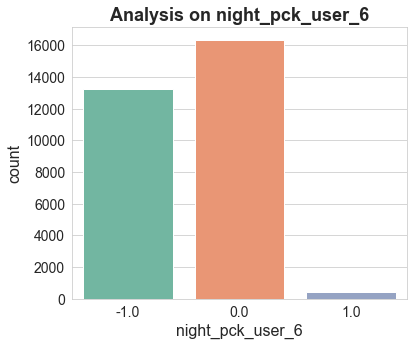

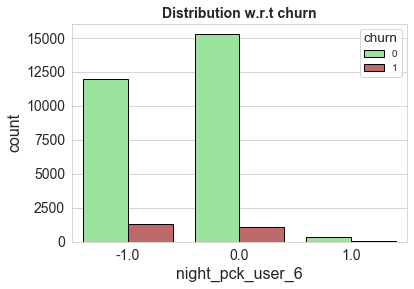

In [43]:
eda_categorical('night_pck_user_6')

- Normalized value counts in night_pck_user_7 column: 
0.0000    0.5560
-1.0000   0.4315
1.0000    0.0125
Name: night_pck_user_7, dtype: float64


- Null values present in night_pck_user_7 column:  0


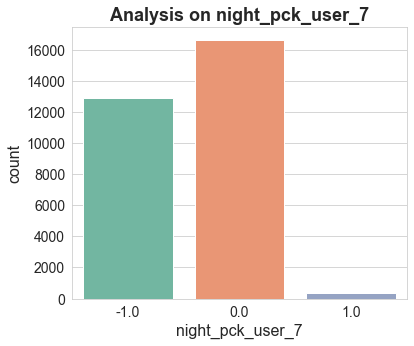

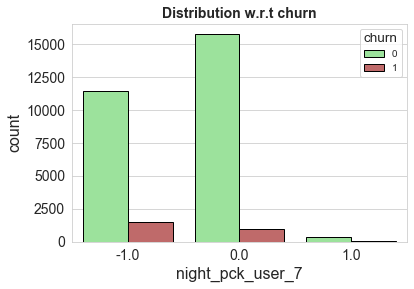

In [44]:
eda_categorical('night_pck_user_7')

- Normalized value counts in night_pck_user_8 column: 
0.0000    0.5204
-1.0000   0.4683
1.0000    0.0114
Name: night_pck_user_8, dtype: float64


- Null values present in night_pck_user_8 column:  0


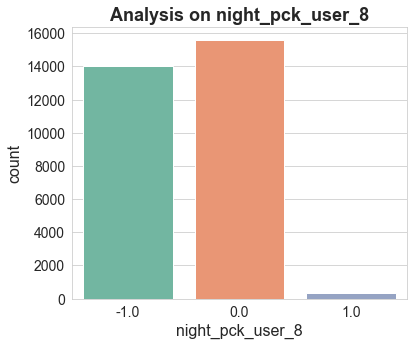

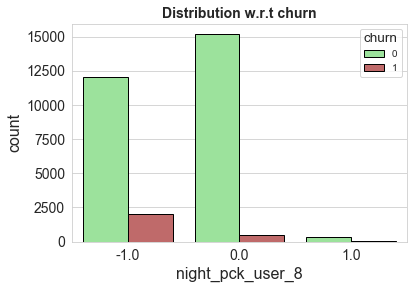

In [45]:
eda_categorical('night_pck_user_8')

- Normalized value counts in fb_user_6 column: 
1.0000    0.5175
-1.0000   0.4415
0.0000    0.0410
Name: fb_user_6, dtype: float64


- Null values present in fb_user_6 column:  0


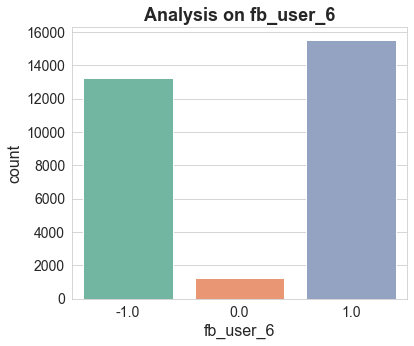

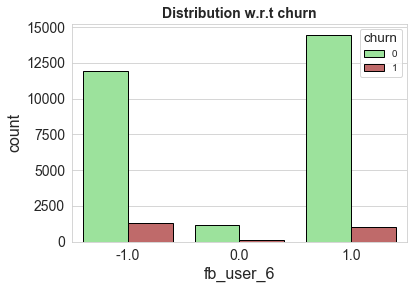

In [46]:
eda_categorical('fb_user_6')

- Normalized value counts in fb_user_7 column: 
1.0000    0.5240
-1.0000   0.4315
0.0000    0.0445
Name: fb_user_7, dtype: float64


- Null values present in fb_user_7 column:  0


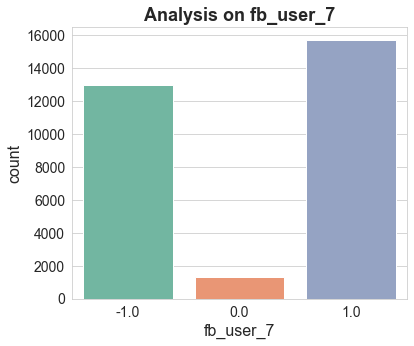

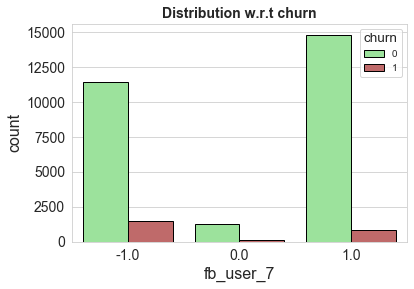

In [47]:
eda_categorical('fb_user_7')

- Normalized value counts in fb_user_8 column: 
1.0000    0.4771
-1.0000   0.4683
0.0000    0.0547
Name: fb_user_8, dtype: float64


- Null values present in fb_user_8 column:  0


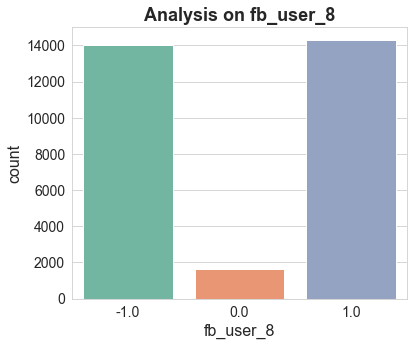

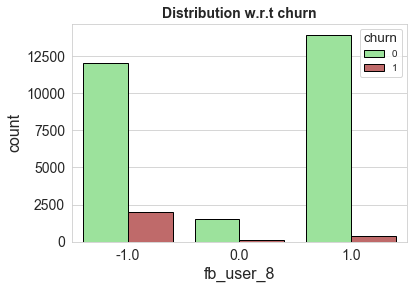

In [48]:
eda_categorical('fb_user_8')

### EDA - CONTINOUS VARIABLES

In [49]:
# Defining a fn to perform eda for numerical columns

def eda_continous(col):
    
    print("\033[1m- Statistical decriptuon: \033[0m")
    print(hvc_filtered[col].describe())
    
    print('\n')
    
    print("\033[1m- Total number of missing values in " +col+ "\033[0m")
    print(hvc_filtered[col].isnull().sum())
    
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
    
    #----- univariate analysis ------------
    
    sns.distplot(hvc_filtered[col], color='teal',ax=ax[0])
    ax[0].set_title("Distribution of "+col, fontsize=14)  
    
     #----- biivariate analysis ------------
    
    sns.boxplot(x=col, y='churn', data=hvc_filtered, color='crimson')
    ax[1].set_title("Box plot: "+col+" vs. Churn", fontsize=14)
    
    plt.show()
    

- Statistical decriptuon: 
count   30001.0000
mean      558.4908
std       460.6405
min     -2258.7090
25%       309.8650
50%       481.6940
75%       699.9430
max     27731.0880
Name: arpu_6, dtype: float64


- Total number of missing values in arpu_6
0


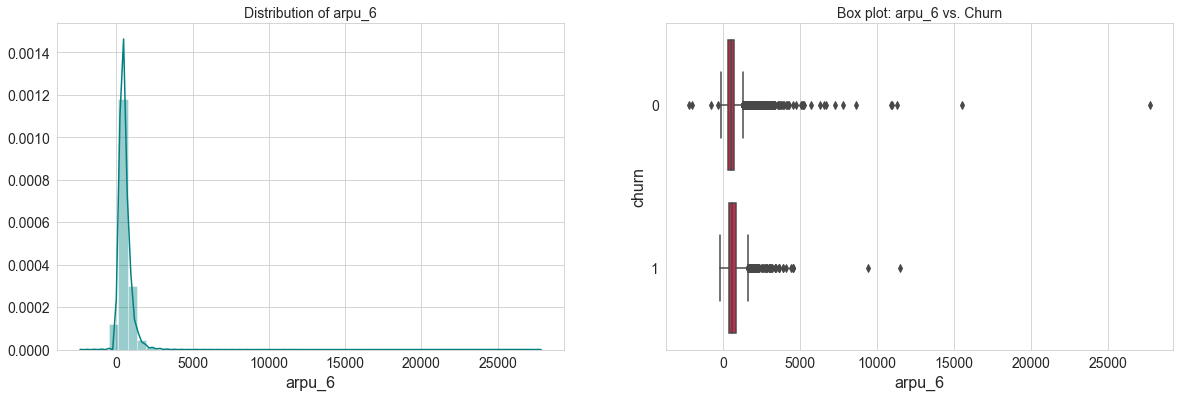

In [50]:
eda_continous('arpu_6')

- Statistical decriptuon: 
count   30001.0000
mean      560.7822
std       479.7769
min     -2014.0450
25%       309.8260
50%       480.9430
75%       698.3150
max     35145.8340
Name: arpu_7, dtype: float64


- Total number of missing values in arpu_7
0


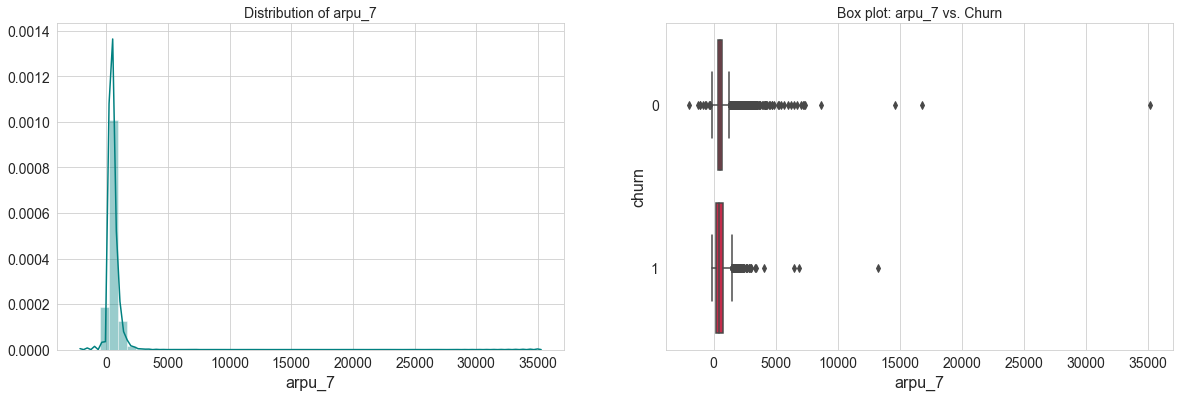

In [51]:
eda_continous('arpu_7')

- Statistical decriptuon: 
count   30001.0000
mean      508.5980
std       501.9620
min      -945.8080
25%       231.4730
50%       427.5850
75%       661.4910
max     33543.6240
Name: arpu_8, dtype: float64


- Total number of missing values in arpu_8
0


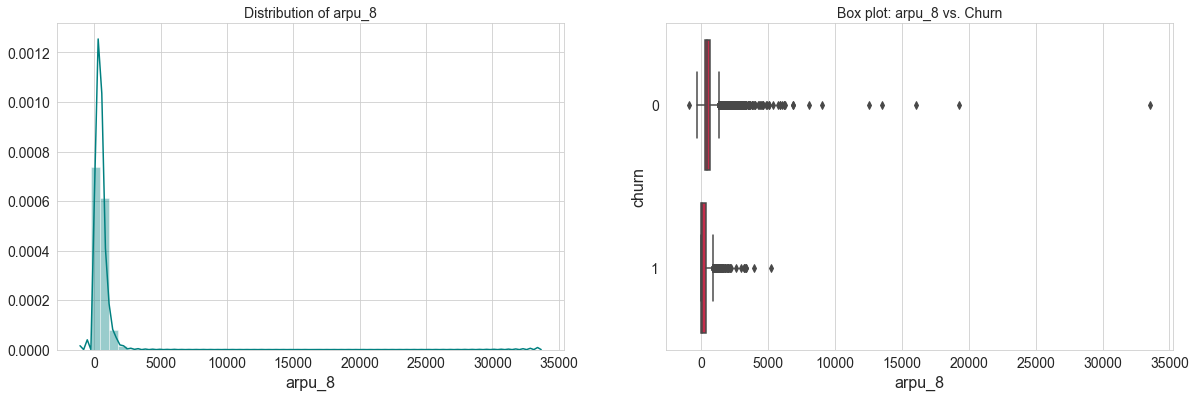

In [52]:
eda_continous('arpu_8')

- Statistical decriptuon: 
count   30001.0000
mean      260.7930
std       459.6444
min         0.0000
25%        17.0800
50%        84.5800
75%       290.4400
max      7376.7100
Name: onnet_mou_6, dtype: float64


- Total number of missing values in onnet_mou_6
0


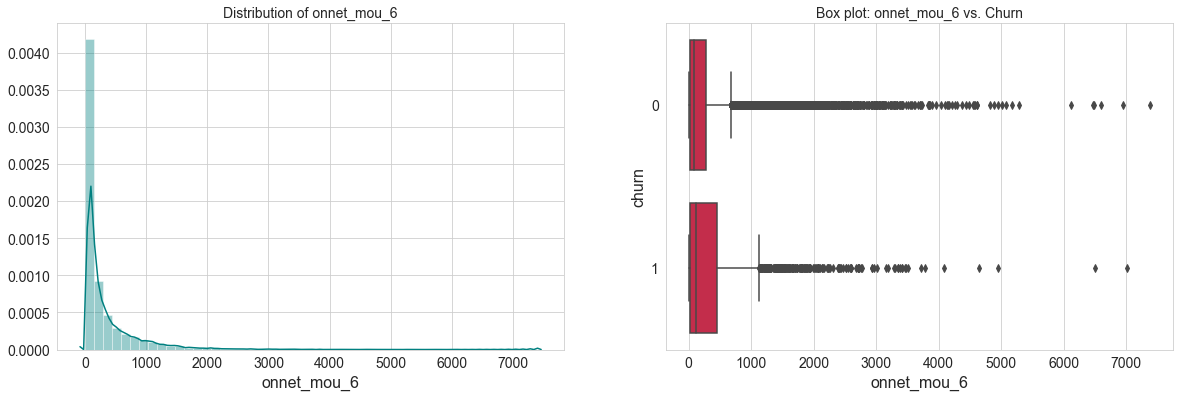

In [53]:
eda_continous('onnet_mou_6')

- Statistical decriptuon: 
count   30001.0000
mean      267.8193
std       479.9940
min         0.0000
25%        16.0300
50%        82.8100
75%       290.2400
max      8157.7800
Name: onnet_mou_7, dtype: float64


- Total number of missing values in onnet_mou_7
0


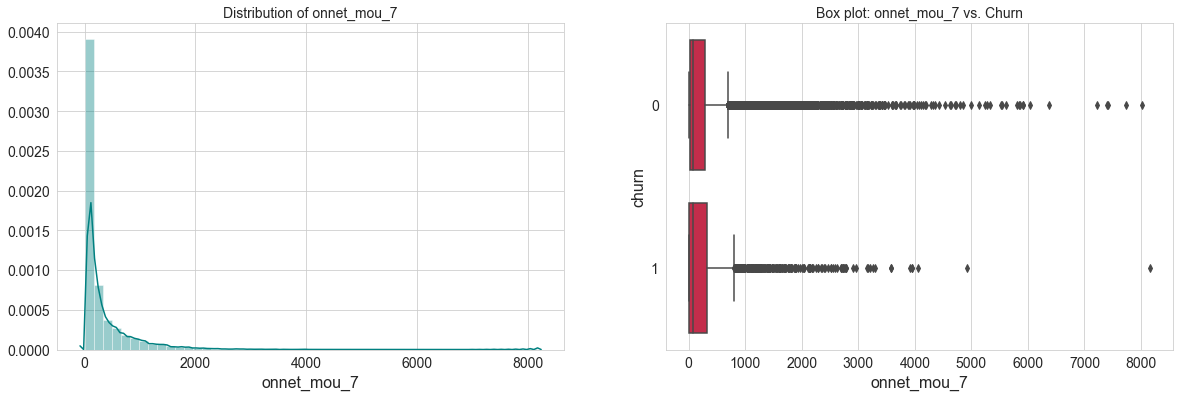

In [54]:
eda_continous('onnet_mou_7')

- Statistical decriptuon: 
count   30001.0000
mean      234.1125
std       458.4486
min         0.0000
25%        10.3900
50%        65.6100
75%       239.9600
max     10752.5600
Name: onnet_mou_8, dtype: float64


- Total number of missing values in onnet_mou_8
0


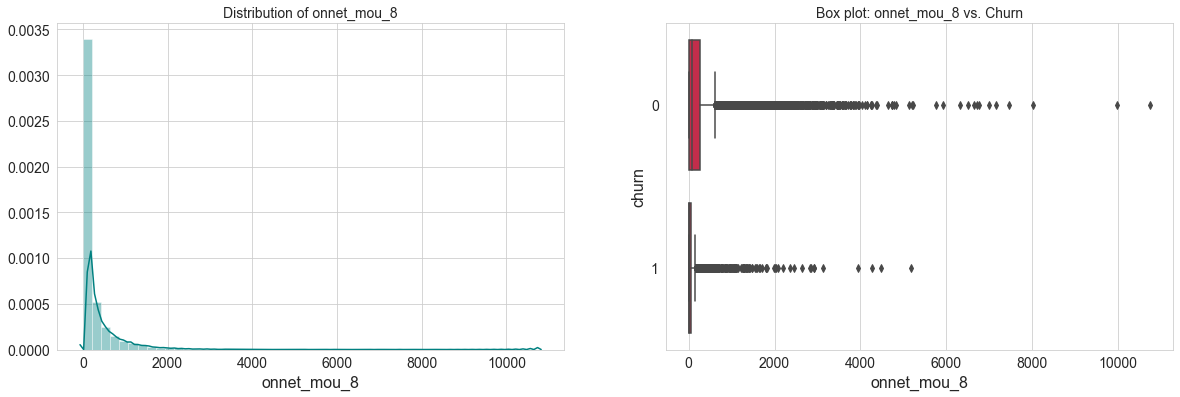

In [55]:
eda_continous('onnet_mou_8')

- Statistical decriptuon: 
count   30001.0000
mean      254.0804
std       378.3391
min         0.0000
25%        32.2600
50%       124.5400
75%       332.0900
max     10643.3800
Name: loc_og_mou_6, dtype: float64


- Total number of missing values in loc_og_mou_6
0


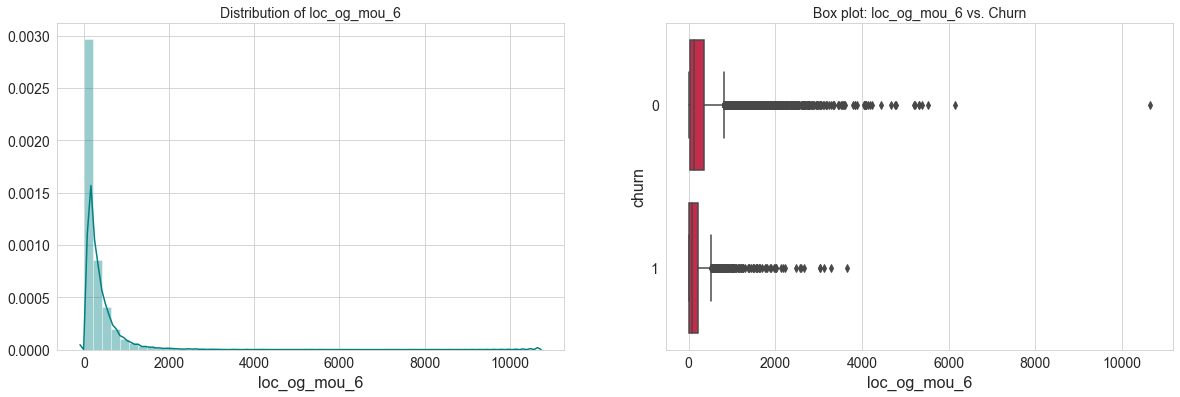

In [56]:
eda_continous('loc_og_mou_6')

- Statistical decriptuon: 
count   30001.0000
mean      255.1163
std       375.4190
min         0.0000
25%        34.4800
50%       127.8800
75%       333.3900
max      7674.7800
Name: loc_og_mou_7, dtype: float64


- Total number of missing values in loc_og_mou_7
0


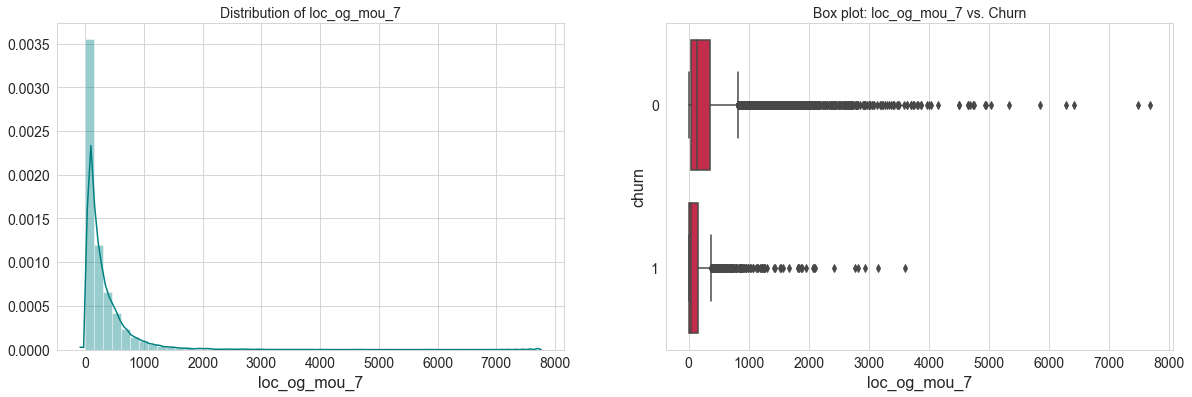

In [57]:
eda_continous('loc_og_mou_7')

- Statistical decriptuon: 
count   30001.0000
mean      235.7282
std       363.3702
min         0.0000
25%        22.4600
50%       110.8100
75%       310.6100
max     11039.9100
Name: loc_og_mou_8, dtype: float64


- Total number of missing values in loc_og_mou_8
0


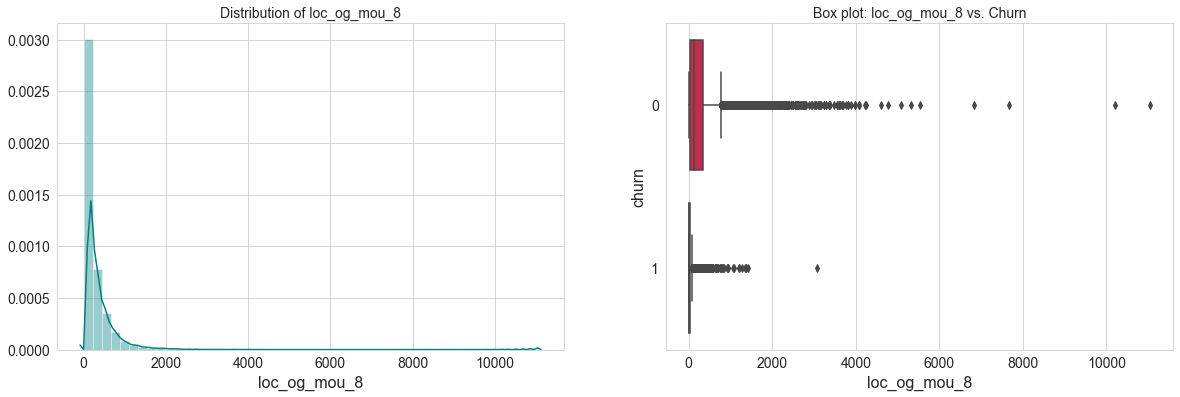

In [58]:
eda_continous('loc_og_mou_8')

- Statistical decriptuon: 
count   30001.0000
mean      609.8663
std       690.8734
min         0.0000
25%       116.5800
50%       410.6300
75%       858.7600
max     10674.0300
Name: total_og_mou_6, dtype: float64


- Total number of missing values in total_og_mou_6
0


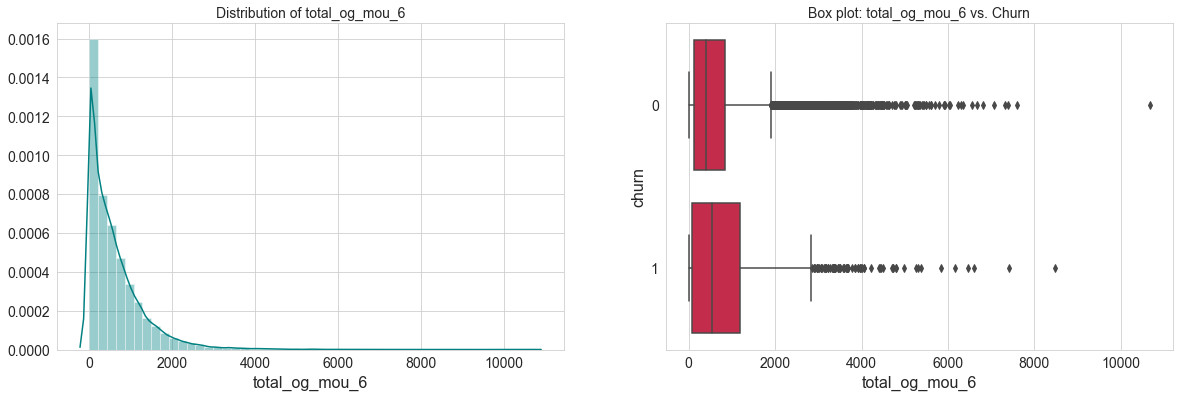

In [59]:
eda_continous('total_og_mou_6')

- Statistical decriptuon: 
count   30001.0000
mean      628.3660
std       717.2192
min         0.0000
25%       116.4900
50%       425.5900
75%       891.4400
max     11365.3100
Name: total_og_mou_7, dtype: float64


- Total number of missing values in total_og_mou_7
0


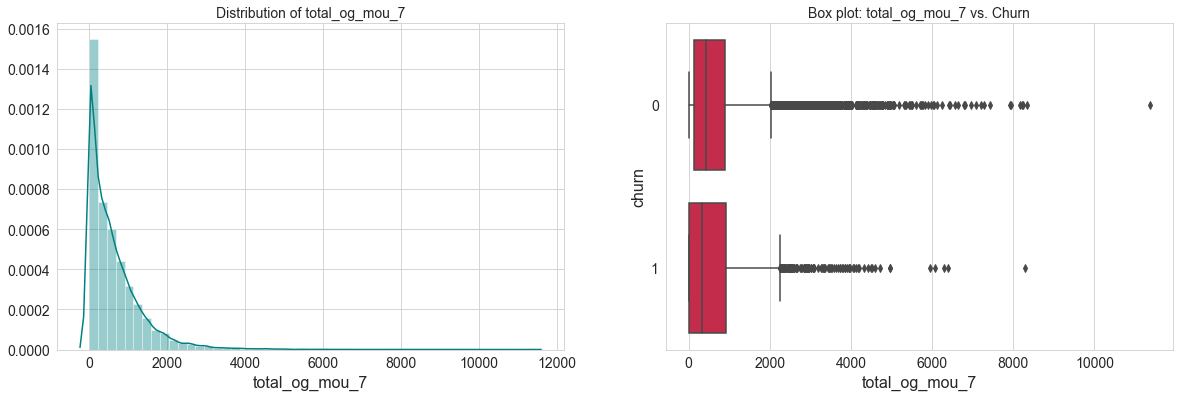

In [60]:
eda_continous('total_og_mou_7')

- Statistical decriptuon: 
count   30001.0000
mean      551.6788
std       700.4782
min         0.0000
25%        72.3600
50%       333.5400
75%       774.7800
max     14043.0600
Name: total_og_mou_8, dtype: float64


- Total number of missing values in total_og_mou_8
0


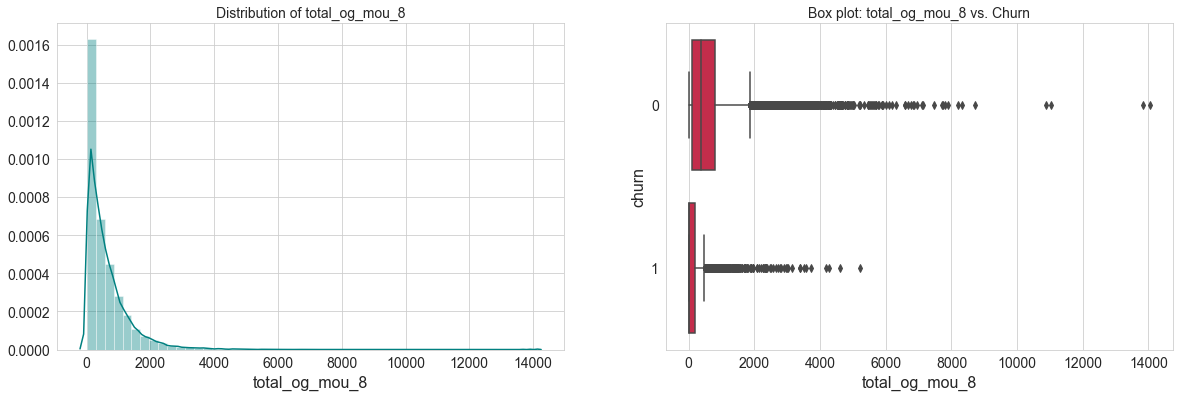

In [61]:
eda_continous('total_og_mou_8')

- Statistical decriptuon: 
count   30001.0000
mean      660.7323
std       561.0329
min         0.0000
25%       360.0000
50%       566.0000
75%       834.0000
max     35190.0000
Name: total_rech_amt_6, dtype: float64


- Total number of missing values in total_rech_amt_6
0


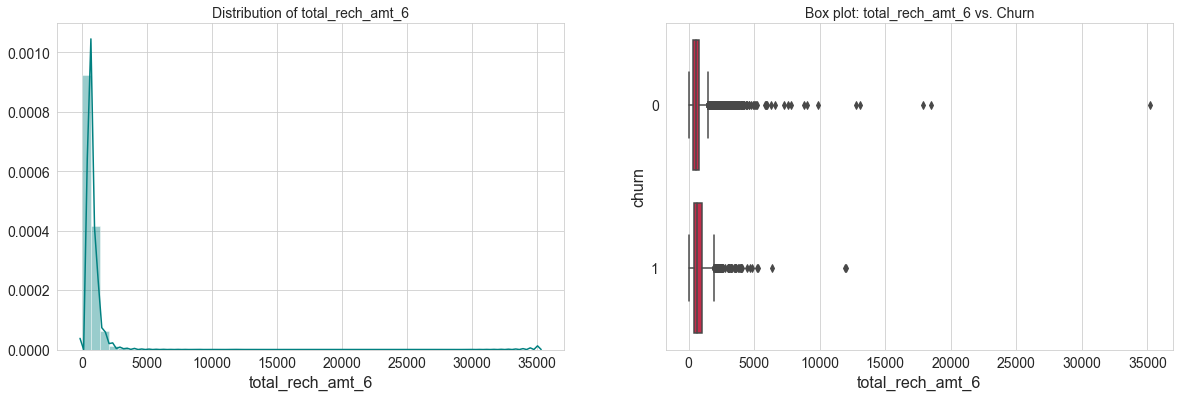

In [62]:
eda_continous('total_rech_amt_6')

- Statistical decriptuon: 
count   30001.0000
mean      660.4980
std       582.4309
min         0.0000
25%       352.0000
50%       562.0000
75%       831.0000
max     40335.0000
Name: total_rech_amt_7, dtype: float64


- Total number of missing values in total_rech_amt_7
0


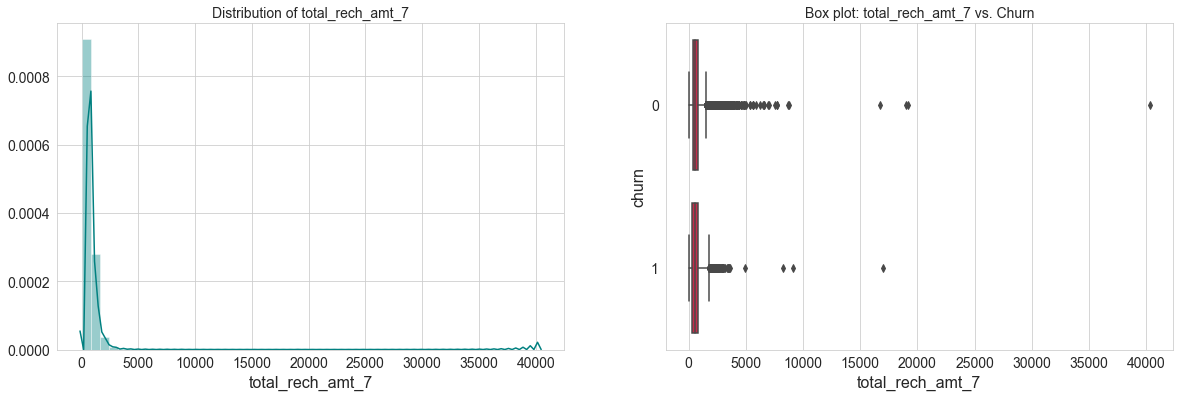

In [63]:
eda_continous('total_rech_amt_7')

- Statistical decriptuon: 
count   30001.0000
mean      584.3655
std       611.2459
min         0.0000
25%       250.0000
50%       490.0000
75%       776.0000
max     45320.0000
Name: total_rech_amt_8, dtype: float64


- Total number of missing values in total_rech_amt_8
0


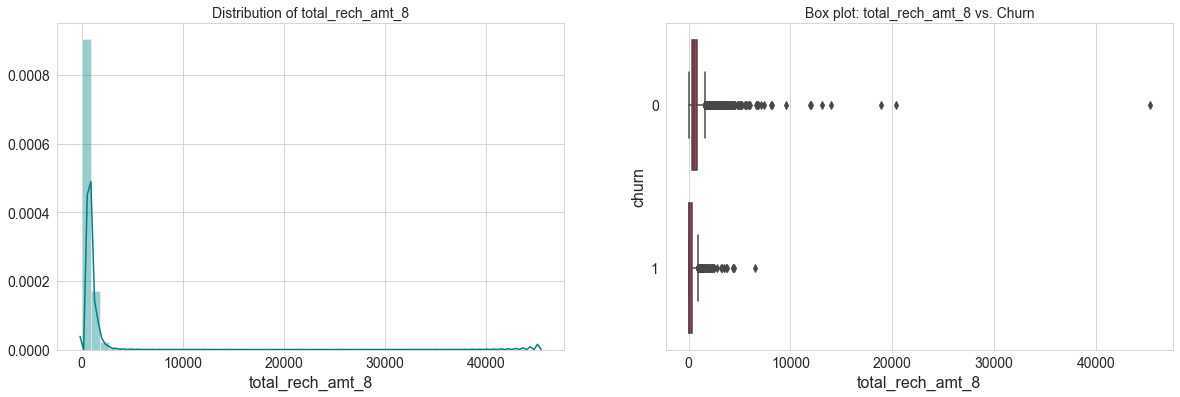

In [64]:
eda_continous('total_rech_amt_8')

#### capping outliers in all continous columns

In [65]:
#Let us define a fn to cap the outliers of all the above numerical columns

def cap_outliers(df):
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            l = df[col].quantile(0.01) #retrieving lower quantile value
            u = df[col].quantile(0.99) #retrieving upper quantile value
            df[col][df[col] <= l] = l #lower outliers capped
            df[col][df[col] >= u] = u #upper outliers capped
        else:
            df[col] = df[col]
        
    return df


In [66]:
#creating a copy to compare later

hvc_filtered_copy = hvc_filtered.copy()

In [67]:
final_hvc = cap_outliers(hvc_filtered_copy)

#P.S --> this step might take approx 4 min to complete. 150+ columns!!!

In [68]:
#comapring filtered dataframe and final dataframe for statistical description to see if outliers have capped

hvc_filtered.describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou     arpu_6     arpu_7  \
count      30001.0000      30001.0000      30001.0000 30001.0000 30001.0000   
mean           0.0000          0.0000          0.0000   558.4908   560.7822   
std            0.0000          0.0000          0.0000   460.6405   479.7769   
min            0.0000          0.0000          0.0000 -2258.7090 -2014.0450   
25%            0.0000          0.0000          0.0000   309.8650   309.8260   
50%            0.0000          0.0000          0.0000   481.6940   480.9430   
75%            0.0000          0.0000          0.0000   699.9430   698.3150   
max            0.0000          0.0000          0.0000 27731.0880 35145.8340   

          arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
count 30001.0000   30001.0000   30001.0000   30001.0000    30001.0000   
mean    508.5980     260.7930     267.8193     234.1125      373.6940   
std     501.9620     459.6444     479.9940     458.4486      482.5236   
min    -945.8080       0.0000       0.0000       0.0000        0.0000   
25%     231.4730      17.0800      16.0300      10.3900       71.6100   
50%     427.5850      84.5800      82.8100      65.6100      222.5400   
75%     661.4910     290.4400     290.2400     239.9600      487.9400   
max   33543.6240    7376.7100    8157.7800   10752.5600     8362.3600   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count    30001.0000    30001.0000     30001.0000     30001.0000   
mean       378.1032      335.0770        16.1104        12.6425   
std        498.9236      482.0625        76.3022        75.7859   
min          0.0000        0.0000         0.0000         0.0000   
25%         69.9100       46.7400         0.0000         0.0000   
50%        220.0300      182.7900         0.0000         0.0000   
75%        494.0100      438.8900         0.0000         0.0000   
max       9667.1300    14007.3400      2613.3100      3813.2900   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count     30001.0000     30001.0000     30001.0000     30001.0000   
mean         12.5006        26.5715        20.1521        19.8656   
std          74.1253       116.2055        96.1004       104.7190   
min           0.0000         0.0000         0.0000         0.0000   
25%           0.0000         0.0000         0.0000         0.0000   
50%           0.0000         0.0000         0.0000         0.0000   
75%           0.0000         0.0000         0.0000         0.0000   
max        4169.8100      3775.1100      2812.0400      5337.0400   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count        30001.0000        30001.0000        30001.0000        30001.0000   
mean            84.4848           85.6743           78.0771          163.2433   
std            228.7940          240.5260          227.3736          250.1167   
min              0.0000            0.0000            0.0000            0.0000   
25%              4.3800            4.6100            2.5300           19.2100   
50%             24.3300           24.6800           20.7300           77.1800   
75%             77.9800           78.3400           72.0400          208.9300   
max           6431.3300         7400.6600        10752.5600         4729.7400   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count        30001.0000        30001.0000        30001.0000        30001.0000   
mean           163.0100          151.7568            6.3441            6.4237   
std            241.5767          233.6609           22.1236           21.9442   
min              0.0000            0.0000            0.0000            0.0000   
25%             20.4600           13.0900            0.0000            0.0000   
50%             78.8800           67.7600            0.0000            0.1000   
75%            208.4100          196.9600            4.2300            4.3800   
max           4557.1400         4

In [69]:
final_hvc.describe()

#looking at the statistical description, outliers are succefully capped

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou     arpu_6     arpu_7  \
count      30001.0000      30001.0000      30001.0000 30001.0000 30001.0000   
mean           0.0000          0.0000          0.0000   548.8098   551.0847   
std            0.0000          0.0000          0.0000   358.1302   360.4332   
min            0.0000          0.0000          0.0000     1.0000     0.7000   
25%            0.0000          0.0000          0.0000   309.8650   309.8260   
50%            0.0000          0.0000          0.0000   481.6940   480.9430   
75%            0.0000          0.0000          0.0000   699.9430   698.3150   
max            0.0000          0.0000          0.0000  1985.1150  1999.5000   

          arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
count 30001.0000   30001.0000   30001.0000   30001.0000    30001.0000   
mean    498.2431     252.1660     258.6237     224.8956      365.8931   
std     383.2951     403.5102     418.1670     390.8570      434.2008   
min       0.0000       0.0000       0.0000       0.0000        0.0000   
25%     231.4730      17.0800      16.0300      10.3900       71.6100   
50%     427.5850      84.5800      82.8100      65.6100      222.5400   
75%     661.4910     290.4400     290.2400     239.9600      487.9400   
max    1986.6220    2151.7400    2201.9600    2159.1100     2326.3600   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count    30001.0000    30001.0000     30001.0000     30001.0000   
mean       369.5170      325.0390        13.5729         9.6363   
std        443.9191      409.7541        49.3370        38.6993   
min          0.0000        0.0000         0.0000         0.0000   
25%         69.9100       46.7400         0.0000         0.0000   
50%        220.0300      182.7900         0.0000         0.0000   
75%        494.0100      438.8900         0.0000         0.0000   
max       2410.8900     2193.1300       342.4400       280.4600   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count     30001.0000     30001.0000     30001.0000     30001.0000   
mean          9.7639        22.7325        16.6889        15.9852   
std          38.9470        79.3126        62.8629        60.4923   
min           0.0000         0.0000         0.0000         0.0000   
25%           0.0000         0.0000         0.0000         0.0000   
50%           0.0000         0.0000         0.0000         0.0000   
75%           0.0000         0.0000         0.0000         0.0000   
max         282.1900       530.7100       438.5900       427.0300   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count        30001.0000        30001.0000        30001.0000        30001.0000   
mean            76.2767           76.6842           69.7313          157.6656   
std            149.8903          150.8252          136.7965          212.5630   
min              0.0000            0.0000            0.0000            0.0000   
25%              4.3800            4.6100            2.5300           19.2100   
50%             24.3300           24.6800           20.7300           77.1800   
75%             77.9800           78.3400           72.0400          208.9300   
max           1006.3600         1018.5300          913.3300         1136.9600   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count        30001.0000        30001.0000        30001.0000        30001.0000   
mean           158.2033          147.3054            5.6432            5.7316   
std            209.5970          204.0275           13.7459           13.8248   
min              0.0000            0.0000            0.0000            0.0000   
25%             20.4600           13.0900            0.0000            0.0000   
50%             78.8800           67.7600            0.0000            0.1000   
75%            208.4100          196.9600            4.2300            4.3800   
max           1111.4800         1

In [70]:
final_hvc.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0          0.0000          0.0000          0.0000  197.3850  214.8160   
1          0.0000          0.0000          0.0000 1069.1800 1349.8500   
2          0.0000          0.0000          0.0000  378.7210  492.2230   
3          0.0000          0.0000          0.0000  514.4530  597.7530   
4          0.0000          0.0000          0.0000   74.3500  193.8970   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  213.8030       0.0000       0.0000       0.0000        0.0000   
1 1986.6220      57.8400      54.6800      52.2900      453.4300   
2  137.3620     413.6900     351.0300      35.0800       94.6600   
3  637.7600     102.4100     132.1100      85.1400      757.9300   
4  366.9660      48.9600      50.6600      33.5800       85.4100   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0        0.0000        0.0000         0.0000         0.0000         0.0000   
1      567.1600      325.9100        16.2300        33.4900        31.6400   
2       80.6300      136.4800         0.0000         0.0000         0.0000   
3      896.6800      983.3900         0.0000         0.0000         0.0000   
4       89.3600      205.8900         0.0000         0.0000         0.0000   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0         0.0000         0.0000         0.0000            0.0000   
1        23.7400        12.5900        38.0600           51.3900   
2         0.0000         0.0000         0.0000          297.1300   
3         0.0000         0.0000         0.0000            4.4800   
4         0.0000         0.0000         0.0000           48.9600   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0            0.0000            0.0000            0.0000            0.0000   
1           31.3800           40.2800          308.6300          447.3800   
2          217.5900           12.4900           80.9600           70.5800   
3            6.1600           23.3400           91.8100           87.9300   
4           50.6600           33.5800           82.9400           83.0100   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0            0.0000            0.0000            0.0000            0.0000   
1          162.2800           62.1300           55.1400           53.2300   
2           50.5400            0.0000            0.0000            0.0000   
3          104.8100            0.7500            0.0000            1.5800   
4          148.5600            0.0000            0.0000            0.0000   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0            0.0000            0.0000            0.0000        0.0000   
1            0.0000            0.0000            0.0000      422.1600   
2            0.0000            0.0000            7.1500      378.0900   
3            0.0000            0.0000            0.0000       97.0400   
4            0.0000            0.0000           17.7100      131.9100   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0        0.0000        0.0000            0.0000            0.0000   
1      533.9100      255.7900            4.3000           23.2900   
2      288.1800       63.0400          116.5600          133.4300   
3       94.0900      129.7400           97.9300          125.9400   
4      133.6800      182.1400            0.0000            0.0000   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0            0.0000            0.0000            0.0000            0.0000   
1           12.0100           49.8900           31.7600           49.1400   
2           22.5800           13.6900           10.0400           75.6900   
3           61.7900          665.3600          808.7400          876.9900   
4            0.0000            2.3600            6.3500           39.6100   

   std_og_t2f_mou_6  std_og_t2f_mo

In [71]:
#finding top 15 correlatd variables from correlation

cor = final_hvc.corr()
top_15 = cor.unstack().sort_values(ascending=False).drop_duplicates()[1:16]
top_15

night_pck_user_6   fb_user_6           0.9566
fb_user_7          night_pck_user_7    0.9563
fb_user_8          night_pck_user_8    0.9548
total_rech_amt_8   arpu_8              0.9452
total_rech_amt_6   arpu_6              0.9388
total_rech_amt_7   arpu_7              0.9307
sachet_2g_8        total_rech_data_8   0.9121
total_rech_data_7  sachet_2g_7         0.9100
sachet_2g_6        total_rech_data_6   0.9094
total_ic_mou_6     loc_ic_mou_6        0.9063
loc_ic_mou_8       total_ic_mou_8      0.9057
total_ic_mou_7     loc_ic_mou_7        0.8981
loc_ic_t2m_mou_8   loc_ic_mou_8        0.8871
loc_ic_mou_6       loc_ic_t2m_mou_6    0.8850
loc_ic_t2m_mou_7   loc_ic_mou_7        0.8751
dtype: float64

# MODELLING

In [73]:
#importing required libraries to perform train test split and scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [74]:
#columns of type int / float to scale

num_cols = final_hvc.select_dtypes(include = ['int64', 'float64']).columns

num_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'total_rech_amt_diff',
       'total_rech_data_diff'],
      dtype='object', length=151)

In [75]:
final_hvc['churn'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [76]:
#let us change the dtype of churn variable from categorical to numeric

final_hvc['churn'] = pd.to_numeric(final_hvc['churn'])

In [77]:
# Putting feature variable to X

X = final_hvc.drop(['churn'], axis=1)

X.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0          0.0000          0.0000          0.0000  197.3850  214.8160   
1          0.0000          0.0000          0.0000 1069.1800 1349.8500   
2          0.0000          0.0000          0.0000  378.7210  492.2230   
3          0.0000          0.0000          0.0000  514.4530  597.7530   
4          0.0000          0.0000          0.0000   74.3500  193.8970   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  213.8030       0.0000       0.0000       0.0000        0.0000   
1 1986.6220      57.8400      54.6800      52.2900      453.4300   
2  137.3620     413.6900     351.0300      35.0800       94.6600   
3  637.7600     102.4100     132.1100      85.1400      757.9300   
4  366.9660      48.9600      50.6600      33.5800       85.4100   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0        0.0000        0.0000         0.0000         0.0000         0.0000   
1      567.1600      325.9100        16.2300        33.4900        31.6400   
2       80.6300      136.4800         0.0000         0.0000         0.0000   
3      896.6800      983.3900         0.0000         0.0000         0.0000   
4       89.3600      205.8900         0.0000         0.0000         0.0000   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0         0.0000         0.0000         0.0000            0.0000   
1        23.7400        12.5900        38.0600           51.3900   
2         0.0000         0.0000         0.0000          297.1300   
3         0.0000         0.0000         0.0000            4.4800   
4         0.0000         0.0000         0.0000           48.9600   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0            0.0000            0.0000            0.0000            0.0000   
1           31.3800           40.2800          308.6300          447.3800   
2          217.5900           12.4900           80.9600           70.5800   
3            6.1600           23.3400           91.8100           87.9300   
4           50.6600           33.5800           82.9400           83.0100   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0            0.0000            0.0000            0.0000            0.0000   
1          162.2800           62.1300           55.1400           53.2300   
2           50.5400            0.0000            0.0000            0.0000   
3          104.8100            0.7500            0.0000            1.5800   
4          148.5600            0.0000            0.0000            0.0000   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0            0.0000            0.0000            0.0000        0.0000   
1            0.0000            0.0000            0.0000      422.1600   
2            0.0000            0.0000            7.1500      378.0900   
3            0.0000            0.0000            0.0000       97.0400   
4            0.0000            0.0000           17.7100      131.9100   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0        0.0000        0.0000            0.0000            0.0000   
1      533.9100      255.7900            4.3000           23.2900   
2      288.1800       63.0400          116.5600          133.4300   
3       94.0900      129.7400           97.9300          125.9400   
4      133.6800      182.1400            0.0000            0.0000   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0            0.0000            0.0000            0.0000            0.0000   
1           12.0100           49.8900           31.7600           49.1400   
2           22.5800           13.6900           10.0400           75.6900   
3           61.7900          665.3600          808.7400          876.9900   
4            0.0000            2.3600            6.3500           39.6100   

   std_og_t2f_mou_6  std_og_t2f_mo

In [78]:
# Putting target variable to y

y = final_hvc['churn']

y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [79]:
y.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [80]:
#splitting to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [81]:
#scaling

scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  arpu_6  arpu_7  arpu_8  \
11785          0.0000          0.0000          0.0000  0.5470  0.4551  0.2983   
11987          0.0000          0.0000          0.0000  0.2582  0.1555  0.1833   
11648          0.0000          0.0000          0.0000  0.1498  0.1568  0.1578   
12890          0.0000          0.0000          0.0000  0.6220  0.1616  0.3551   
3762           0.0000          0.0000          0.0000  0.2202  0.2285  0.1330   

       onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
11785       0.0026       0.0038       0.0022        0.0653        0.0660   
11987       0.0673       0.0226       0.0189        0.1380        0.0944   
11648       0.0322       0.0350       0.0386        0.1433        0.1238   
12890       1.0000       0.0753       0.3230        0.2020        0.0833   
3762        0.0082       0.0209       0.0111        0.0803        0.1253   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
11785        0.0447         0.0846         0.0951         0.1102   
11987        0.1210         0.0000         0.0000         0.0000   
11648        0.0973         0.0518         0.1508         0.2424   
12890        0.2531         0.0000         0.1418         0.0808   
3762         0.0372         0.0000         0.0000         0.0000   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
11785         0.0116         0.0328         0.0231            0.0054   
11987         0.0000         0.0000         0.0000            0.0641   
11648         0.0433         0.0486         0.1796            0.0214   
12890         0.0000         0.0764         0.0552            0.0411   
3762          0.0000         0.0000         0.0000            0.0138   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
11785            0.0073            0.0053            0.0190            0.0275   
11987            0.0300            0.0446            0.2440            0.1615   
11648            0.0114            0.0291            0.1848            0.1966   
12890            0.0321            0.6940            0.2385            0.1308   
3762             0.0282            0.0131            0.1605            0.2473   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
11785            0.0182            0.0136            0.0000            0.0000   
11987            0.1944            0.1385            0.0593            0.4200   
11648            0.1170            0.0357            0.0799            0.0000   
12890            0.3291            0.0165            0.2529            0.2305   
3762             0.0717            0.0446            0.2877            0.0435   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
11785            0.0000            0.2287            0.0390        0.0158   
11987            0.0000            0.5901            0.0000        0.1979   
11648            0.0000            0.0000            0.0000        0.1313   
12890            0.0000            0.0000            0.0844        0.1755   
3762             0.0000            0.0000            0.0000        0.1120   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
11785        0.0218        0.0148            0.0000            0.0000   
11987        0.1233        0.1725            0.0427            0.0100   
11648        0.1358        0.0925            0.0231            0.0319   
12890        0.1146        0.6080            1.0000            0.0694   
3762         0.1883        0.0563            0.0020            0.0072   

       std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
11785            0.0000            0.0013            0.0052            0.0070   
11987            0.0000            0.0162            0.0093            0.0102   
11648            0.0142            0.0519            0.0264            0.0205   
12890            0.01

In [82]:
#displaying shape of train and test dataset

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (21000, 151)
y_train shape:  (21000,)
X_test shape:  (9001, 151)
y_test shape:  (9001,)


# MODEL 1: LOGISTIC REGRESSION W/O PCA

In [83]:
#importing required libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#data imbalance
from imblearn.over_sampling import SMOTE

In [84]:
#first let us handle data imbalance using SMOTE ---> will be using this sample for the rest of the analysis.

smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

In [85]:
X_train_smt.shape

(38618, 151)

In [86]:
y_train_smt.shape

(38618,)

In [87]:
#balanced data between churn and non-churn

y_train_smt.value_counts()

1    19309
0    19309
Name: churn, dtype: int64

In [88]:
# Logistic regression model

logm1 = sm.GLM(y_train_smt,(sm.add_constant(X_train_smt)), family = sm.families.Binomial())

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38477
Model Family:                Binomial   Df Model:                          140
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13684.
Date:                Sat, 06 Mar 2021   Deviance:                       27368.
Time:                        13:13:44   Pearson chi2:                 1.39e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.5105      0.527      6.662      0.000       2.478       4.543
loc_og_t2o_mou        5.593e-14   9.44e-15      5.922      0.000    3.74e-14    7.44e-14
std_og_t2o_mou        5.799e-14   6.12e-15      9.481      0.000     4.6e-14       7e-14
loc_ic_t2o_mou       -4.046e-14   8.09e-15     -5.003      0.000   -5.63e-14   -2.46e-14
arpu_6                   1.1773      0.363      3.242      0.001       0.466       1.889
arpu_7                   1.9263      0.369      5.215      0.000       1.202       2.650
arpu_8                   1.0908      0.410      2.663      0.008       0.288       1.894
onnet_mou_6             -0.7165      0.876     -0.818      0.413      -2.434       1.001
onnet_mou_7              6.3166      1.021      6.185      0.000       4.315       8.318
onnet_mou_8             -6.0839      1.110     -5.481      0.000      -8.260      -3.908
offnet_mou_6             2.0949      0.870      2.409      0.016       0.390       3.799
offnet_mou_7             2.8628      1.078      2.655      0.008       0.750       4.976
offnet_mou_8            -5.1626      0.980     -5.268      0.000      -7.083      -3.242
roam_ic_mou_6           -0.0108      0.215     -0.050      0.960      -0.432       0.411
roam_ic_mou_7            0.3477      0.239      1.452      0.147      -0.122       0.817
roam_ic_mou_8           -0.2364      0.221     -1.068      0.286      -0.670       0.198
roam_og_mou_6           -0.6093      0.292     -2.088      0.037      -1.181      -0.037
roam_og_mou_7           -0.4240      0.292     -1.450      0.147      -0.997       0.149
roam_og_mou_8            1.8355      0.277      6.637      0.000       1.293       2.378
loc_og_t2t_mou_6         0.8270      0.737      1.122      0.262      -0.618       2.272
loc_og_t2t_mou_7        -5.1845      0.879     -5.896      0.000      -6.908      -3.461
loc_og_t2t_mou_8         1.7167      1.376      1.247      0.212      -0.981       4.414
loc_og_t2m_mou_6        -1.0661      0.765     -1.393      0.164      -2.566       0.434
loc_og_t2m_mou_7        -4.4443      0.912     -4.873      0.000      -6.232      -2.657
loc_og_t2m_mou_8         1.0600      1.549      0.684      0.494      -1.977       4.097
loc_og_t2f_mou_6        -0.5648      0.242     -2.331      0.020      -1.040      -0.090
loc_og_t2f_mou_7        -1.0039      0.278     -3.605      0.000      -1.550      -0.458
loc_og_t2f_mou_8         0.8362      0.290      2.880      0.004       0.267       1.405
loc_og_t2c_mou_6        -0.6103      0.137     -4.445      0.000      -0.879      -0.341
loc_og_t2c_mou_7        -0.4223      0.159     -2.650      0.008      -0.735      -0.110
loc_og_t2c_mou_8         0.5686      0.177      3.219      0.001       0.222       0.915
loc_og_mou_6             0.3652      1.504      0.243    

In [89]:
logreg = LogisticRegression()

In [90]:
#selecting 15 variables with RFE

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output

rfe = rfe.fit(X_train_smt, y_train_smt)

In [91]:
rfe.support_

array([False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False,

In [92]:
list(zip(X_train_smt.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 137),
 ('std_og_t2o_mou', False, 136),
 ('loc_ic_t2o_mou', False, 135),
 ('arpu_6', False, 66),
 ('arpu_7', True, 1),
 ('arpu_8', False, 77),
 ('onnet_mou_6', False, 110),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 14),
 ('offnet_mou_6', False, 31),
 ('offnet_mou_7', False, 90),
 ('offnet_mou_8', False, 15),
 ('roam_ic_mou_6', False, 124),
 ('roam_ic_mou_7', False, 94),
 ('roam_ic_mou_8', False, 96),
 ('roam_og_mou_6', False, 72),
 ('roam_og_mou_7', False, 73),
 ('roam_og_mou_8', False, 16),
 ('loc_og_t2t_mou_6', False, 85),
 ('loc_og_t2t_mou_7', False, 11),
 ('loc_og_t2t_mou_8', False, 69),
 ('loc_og_t2m_mou_6', False, 70),
 ('loc_og_t2m_mou_7', False, 12),
 ('loc_og_t2m_mou_8', False, 41),
 ('loc_og_t2f_mou_6', False, 76),
 ('loc_og_t2f_mou_7', False, 49),
 ('loc_og_t2f_mou_8', False, 75),
 ('loc_og_t2c_mou_6', False, 62),
 ('loc_og_t2c_mou_7', False, 82),
 ('loc_og_t2c_mou_8', False, 79),
 ('loc_og_mou_6', False, 71),
 ('loc_og_mou_7', False, 13),


In [93]:
rfe_cols = X_train_smt.columns[rfe.support_]

rfe_cols

Index(['arpu_7', 'onnet_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_7',
       'std_og_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'av_rech_amt_data_7', 'vol_2g_mb_8', 'sep_vbc_3g',
       'total_rech_data_diff'],
      dtype='object')

In [94]:
X_train_smt.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_amt_diff'],
      dtype='object', length=136)

In [95]:
X_train_rfe = X_train_smt[rfe_cols]

In [96]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [97]:
logm2 = sm.GLM(y_train_smt, X_train_rfe, family = sm.families.Binomial())

res = logm2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38602
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14892.
Date:                Sat, 06 Mar 2021   Deviance:                       29784.
Time:                        13:16:14   Pearson chi2:                 1.58e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.6358      0.065     40.856      0.000       2.509       2.762
arpu_7                   3.8923      0.119     32.691      0.000       3.659       4.126
onnet_mou_7              4.0518      0.305     13.288      0.000       3.454       4.649
loc_og_mou_8            -6.9946      0.279    -25.067      0.000      -7.542      -6.448
std_og_t2t_mou_7        -3.4693      0.287    -12.081      0.000      -4.032      -2.906
std_og_mou_8            -2.1464      0.131    -16.386      0.000      -2.403      -1.890
loc_ic_t2m_mou_6         2.3573      0.157     15.062      0.000       2.051       2.664
loc_ic_mou_8            -7.7055      0.446    -17.260      0.000      -8.581      -6.831
total_ic_mou_8          -3.0215      0.334     -9.038      0.000      -3.677      -2.366
spl_ic_mou_8            -3.4848      0.197    -17.683      0.000      -3.871      -3.099
total_rech_num_8        -3.6923      0.132    -27.896      0.000      -3.952      -3.433
last_day_rch_amt_8      -3.0044      0.103    -29.290      0.000      -3.205      -2.803
av_rech_amt_data_7      -2.4317      0.093    -26.211      0.000      -2.613      -2.250
vol_2g_mb_8             -4.0067      0.182    -21.964      0.000      -4.364      -3.649
sep_vbc_3g              -7.2446      0.515    -14.079      0.000      -8.253      -6.236
total_rech_data_diff    -2.5000      0.127    -19.645      0.000      -2.749      -2.251
========================================================================================
"""

In [98]:
#let us predict the values of y_train

y_train_pred = res.predict(X_train_rfe)

y_train_pred[:10]

0   0.6755
1   0.0410
2   0.2979
3   0.0000
4   0.1513
5   0.1755
6   0.0031
7   0.0546
8   0.5978
9   0.2646
dtype: float64

In [99]:
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred[:10]

array([6.75504689e-01, 4.09601843e-02, 2.97891700e-01, 8.97720793e-07,
       1.51294498e-01, 1.75520779e-01, 3.05239865e-03, 5.46411238e-02,
       5.97819186e-01, 2.64557353e-01])

In [100]:
#creating a dataframe with churn rate and predicted probability

y_train_pred_df = pd.DataFrame({"churn": y_train_smt.values, "churn_prob": y_train_pred})

y_train_pred_df.head()

churn  churn_prob
0      0      0.6755
1      0      0.0410
2      0      0.2979
3      0      0.0000
4      0      0.1513

In [101]:
#creating a new colum 'Predicted' with values 1 and 0; resulting from a cut off of 0.5 from churn_prob

y_train_pred_df['Predicted'] = y_train_pred_df.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_df.head()

churn  churn_prob  Predicted
0      0      0.6755          1
1      0      0.0410          0
2      0      0.2979          0
3      0      0.0000          0
4      0      0.1513          0

In [102]:
#importing required libraries

from sklearn import metrics

#confusion metrics

confusion = metrics.confusion_matrix(y_train_pred_df.churn, y_train_pred_df.Predicted)

print(confusion)

[[15743  3566]
 [ 2602 16707]]


In [103]:
#checking overall accuracy

print(metrics.accuracy_score(y_train_pred_df.churn, y_train_pred_df.Predicted))

0.8402817339064684


In [104]:
#creating a dataframe to store the vif values

vif = pd.DataFrame()

vif['Features'] = X_train_rfe.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]

vif['VIF'] = round(vif['VIF'], 2) #rounding the values to two decimal places

vif = vif.sort_values(by='VIF', ascending = False)

vif

Features     VIF
0                  const 16.0200
4       std_og_t2t_mou_7  8.5400
2            onnet_mou_7  8.4400
7           loc_ic_mou_8  8.2900
8         total_ic_mou_8  7.0900
3           loc_og_mou_8  2.4000
5           std_og_mou_8  1.9300
6       loc_ic_t2m_mou_6  1.6300
10      total_rech_num_8  1.6100
1                 arpu_7  1.6000
11    last_day_rch_amt_8  1.2700
12    av_rech_amt_data_7  1.2600
15  total_rech_data_diff  1.1700
13           vol_2g_mb_8  1.1100
9           spl_ic_mou_8  1.0400
14            sep_vbc_3g  1.0400

In [105]:
#since all p values are 0, we drop the feature with high vif value.

#dropping 'std_og_t2t_mou_7' with vif = 8.5400

X_train_new = X_train_rfe.drop('std_og_t2t_mou_7', axis = 1)

In [106]:
#building model again

X_train_lm = sm.add_constant(X_train_new)

logm3 = sm.GLM(y_train_smt, X_train_lm, family = sm.families.Binomial())

res = logm3.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38603
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14965.
Date:                Sat, 06 Mar 2021   Deviance:                       29929.
Time:                        13:16:17   Pearson chi2:                 1.28e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.6481      0.065     41.038      0.000       2.522       2.775
arpu_7                   4.0824      0.118     34.489      0.000       3.850       4.314
onnet_mou_7              0.5736      0.105      5.445      0.000       0.367       0.780
loc_og_mou_8            -5.5450      0.248    -22.385      0.000      -6.031      -5.060
std_og_mou_8            -2.5193      0.129    -19.496      0.000      -2.773      -2.266
loc_ic_t2m_mou_6         2.3245      0.155     14.950      0.000       2.020       2.629
loc_ic_mou_8            -7.9640      0.449    -17.727      0.000      -8.845      -7.083
total_ic_mou_8          -3.0420      0.335     -9.075      0.000      -3.699      -2.385
spl_ic_mou_8            -3.4750      0.197    -17.658      0.000      -3.861      -3.089
total_rech_num_8        -3.7157      0.132    -28.132      0.000      -3.975      -3.457
last_day_rch_amt_8      -3.0036      0.101    -29.608      0.000      -3.202      -2.805
av_rech_amt_data_7      -2.4769      0.093    -26.688      0.000      -2.659      -2.295
vol_2g_mb_8             -3.9714      0.182    -21.831      0.000      -4.328      -3.615
sep_vbc_3g              -7.2302      0.513    -14.089      0.000      -8.236      -6.224
total_rech_data_diff    -2.5562      0.127    -20.090      0.000      -2.806      -2.307
========================================================================================
"""

In [107]:
#let us predict the values of y_train

y_train_pred = res.predict(X_train_lm)

y_train_pred[:10]

0   0.6843
1   0.0478
2   0.3162
3   0.0000
4   0.1442
5   0.1741
6   0.0031
7   0.0535
8   0.5954
9   0.2541
dtype: float64

In [108]:
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred[:10]

array([6.84254854e-01, 4.77562534e-02, 3.16233155e-01, 1.57377129e-06,
       1.44186899e-01, 1.74091060e-01, 3.13337977e-03, 5.35296493e-02,
       5.95412477e-01, 2.54085892e-01])

In [109]:
#creating a dataframe with churn rate and predicted probability

y_train_pred_df = pd.DataFrame({"churn": y_train_smt.values, "churn_prob": y_train_pred})

y_train_pred_df.head()

churn  churn_prob
0      0      0.6843
1      0      0.0478
2      0      0.3162
3      0      0.0000
4      0      0.1442

In [110]:
#creating a new colum 'Predicted' with values 1 and 0; resulting from a cut off of 0.5 from churn_prob

y_train_pred_df['Predicted'] = y_train_pred_df.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_df.head()

churn  churn_prob  Predicted
0      0      0.6843          1
1      0      0.0478          0
2      0      0.3162          0
3      0      0.0000          0
4      0      0.1442          0

In [111]:
#confusion matrics

confusion = metrics.confusion_matrix(y_train_pred_df.churn, y_train_pred_df.Predicted)

print(confusion)

[[15730  3579]
 [ 2579 16730]]


In [112]:
#checking overall accuracy

print(metrics.accuracy_score(y_train_pred_df.churn, y_train_pred_df.Predicted))

0.8405406805116785


In [113]:
#creating a dataframe to store the vif values

vif = pd.DataFrame()

vif['Features'] = X_train_new.columns

vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]

vif['VIF'] = round(vif['VIF'], 2) #rounding the values to two decimal places

vif = vif.sort_values(by='VIF', ascending = False)

vif

Features     VIF
0                  const 16.0200
6           loc_ic_mou_8  8.2800
7         total_ic_mou_8  7.0900
3           loc_og_mou_8  1.9100
4           std_og_mou_8  1.8200
5       loc_ic_t2m_mou_6  1.6300
9       total_rech_num_8  1.6100
1                 arpu_7  1.6000
2            onnet_mou_7  1.5700
10    last_day_rch_amt_8  1.2700
11    av_rech_amt_data_7  1.2600
14  total_rech_data_diff  1.1700
12           vol_2g_mb_8  1.1100
8           spl_ic_mou_8  1.0400
13            sep_vbc_3g  1.0400

In [114]:
#p value still remains 0 for all features, dropping features based vif

#dropping 'loc_ic_mou_8' with vif = 8.28

X_train_new = X_train_lm.drop('loc_ic_mou_8', axis = 1)

In [115]:
#building model again

X_train_lm = sm.add_constant(X_train_new)

logm3 = sm.GLM(y_train_smt, X_train_lm, family = sm.families.Binomial())

res = logm3.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38604
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15109.
Date:                Sat, 06 Mar 2021   Deviance:                       30218.
Time:                        13:16:19   Pearson chi2:                 1.26e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.6676      0.064     41.544      0.000       2.542       2.793
arpu_7                   4.2964      0.119     36.194      0.000       4.064       4.529
onnet_mou_7              0.4985      0.106      4.709      0.000       0.291       0.706
loc_og_mou_8            -6.9682      0.247    -28.218      0.000      -7.452      -6.484
std_og_mou_8            -2.4433      0.129    -18.923      0.000      -2.696      -2.190
loc_ic_t2m_mou_6         1.4867      0.139     10.724      0.000       1.215       1.758
total_ic_mou_8          -8.2682      0.264    -31.266      0.000      -8.786      -7.750
spl_ic_mou_8            -3.4823      0.197    -17.634      0.000      -3.869      -3.095
total_rech_num_8        -3.8180      0.132    -28.825      0.000      -4.078      -3.558
last_day_rch_amt_8      -3.0273      0.102    -29.665      0.000      -3.227      -2.827
av_rech_amt_data_7      -2.6278      0.093    -28.371      0.000      -2.809      -2.446
vol_2g_mb_8             -4.0485      0.182    -22.185      0.000      -4.406      -3.691
sep_vbc_3g              -7.3537      0.517    -14.236      0.000      -8.366      -6.341
total_rech_data_diff    -2.5565      0.127    -20.193      0.000      -2.805      -2.308
========================================================================================
"""

In [116]:
#let us predict the values of y_train

y_train_pred = res.predict(X_train_lm)

y_train_pred[:10]

0   0.6853
1   0.0610
2   0.3183
3   0.0000
4   0.2563
5   0.1794
6   0.0079
7   0.0812
8   0.5928
9   0.3482
dtype: float64

In [117]:
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred[:10]

array([6.85255226e-01, 6.09970510e-02, 3.18294903e-01, 1.84801799e-05,
       2.56314443e-01, 1.79449785e-01, 7.91134349e-03, 8.11733304e-02,
       5.92755439e-01, 3.48158820e-01])

In [118]:
#creating a dataframe with churn rate and predicted probability

y_train_pred_df = pd.DataFrame({"churn": y_train_smt.values, "churn_prob": y_train_pred})

y_train_pred_df.head()

churn  churn_prob
0      0      0.6853
1      0      0.0610
2      0      0.3183
3      0      0.0000
4      0      0.2563

In [119]:
#creating a new colum 'Predicted' with values 1 and 0; resulting from a cut off of 0.5 from churn_prob

y_train_pred_df['Predicted'] = y_train_pred_df.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_df.head()

churn  churn_prob  Predicted
0      0      0.6853          1
1      0      0.0610          0
2      0      0.3183          0
3      0      0.0000          0
4      0      0.2563          0

In [120]:
#confusion matrics

confusion = metrics.confusion_matrix(y_train_pred_df.churn, y_train_pred_df.Predicted)

print(confusion)

[[15699  3610]
 [ 2598 16711]]


In [121]:
#checking overall accuracy

print(metrics.accuracy_score(y_train_pred_df.churn, y_train_pred_df.Predicted))

0.8392459474856284


In [122]:
#creating a dataframe to store the vif values

vif = pd.DataFrame()

vif['Features'] = X_train_new.columns

vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]

vif['VIF'] = round(vif['VIF'], 2) #rounding the values to two decimal places

vif = vif.sort_values(by='VIF', ascending = False)

vif

Features     VIF
0                  const 16.0100
6         total_ic_mou_8  2.0000
4           std_og_mou_8  1.8000
3           loc_og_mou_8  1.7700
8       total_rech_num_8  1.6100
1                 arpu_7  1.5900
2            onnet_mou_7  1.5700
5       loc_ic_t2m_mou_6  1.5000
9     last_day_rch_amt_8  1.2700
10    av_rech_amt_data_7  1.2500
13  total_rech_data_diff  1.1700
11           vol_2g_mb_8  1.1100
7           spl_ic_mou_8  1.0400
12            sep_vbc_3g  1.0400

- ***`above model is significant which is evident from p value of all featurees being 0 and vif being less than 5.`***
- ***`no presence of multicollinearity; vif < 5`***
- ***`Accuracy of the model is 83.92%`***

### Sensitivity, Specificity, False positive rate

In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
#sensitivity of our logistic regression model

TP / float(TP+FN)

0.865451343932881

In [125]:
#specificity of our logistic regression model

TN / float(TN+FP)

0.8130405510383759

In [126]:
# Calculate false postive rate - predicting non_converted customer as converted

print(FP/ float(TN+FP))

0.18695944896162411


In [127]:
# positive predictive value 

print (TP / float(TP+FP))

0.8223512622410315


In [128]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8580095097556977


### ROC CURVE

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
pr, tpr, thresholds = metrics.roc_curve(y_train_pred_df.churn, y_train_pred_df.churn_prob, drop_intermediate = False )

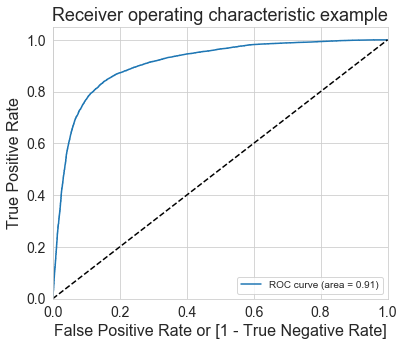

In [131]:
#plot

draw_roc(y_train_pred_df.churn, y_train_pred_df.churn_prob)

****`ROC-AUC Score = 0.91`****

In [132]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

churn  churn_prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0      0.6853          1    1    1    1    1    1    1    1    0    0   
1      0      0.0610          0    1    0    0    0    0    0    0    0    0   
2      0      0.3183          0    1    1    1    1    0    0    0    0    0   
3      0      0.0000          0    1    0    0    0    0    0    0    0    0   
4      0      0.2563          0    1    1    1    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [133]:
#calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix, classification_report

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    
    cm1 = metrics.confusion_matrix(y_train_pred_df.churn, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

         prob  accuracy  sensi  speci
0.0000 0.0000    0.5000 1.0000 0.0000
0.1000 0.1000    0.7069 0.9761 0.4377
0.2000 0.2000    0.7607 0.9511 0.5703
0.3000 0.3000    0.7974 0.9281 0.6667
0.4000 0.4000    0.8228 0.8977 0.7480
0.5000 0.5000    0.8392 0.8655 0.8130
0.6000 0.6000    0.8409 0.8160 0.8657
0.7000 0.7000    0.8279 0.7431 0.9126
0.8000 0.8000    0.7797 0.6085 0.9508
0.9000 0.9000    0.6340 0.2846 0.9834


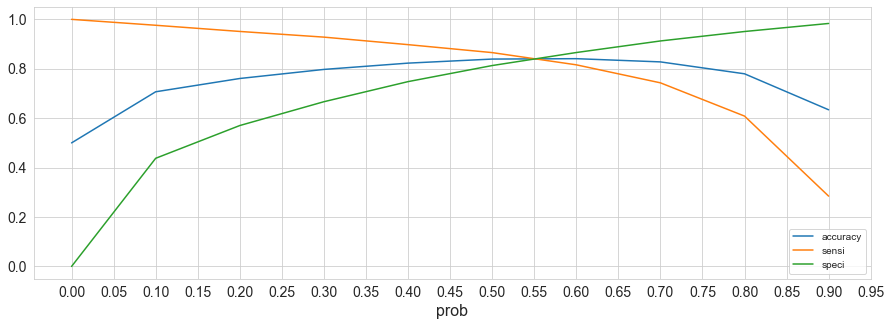

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(15,5))
plt.xticks(np.arange(0,1,.05))
plt.show()


In [135]:
#optimal cut-off as per the plot is 0.55

y_train_pred_df['final_predicted'] = y_train_pred_df.churn_prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_df.head()

churn  churn_prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0      0.6853          1    1    1    1    1    1    1    1    0    0   
1      0      0.0610          0    1    0    0    0    0    0    0    0    0   
2      0      0.3183          0    1    1    1    1    0    0    0    0    0   
3      0      0.0000          0    1    0    0    0    0    0    0    0    0   
4      0      0.2563          0    1    1    1    0    0    0    0    0    0   

   0.9  final_predicted  
0    0                1  
1    0                0  
2    0                0  
3    0                0  
4    0                0

In [136]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_df.churn, y_train_pred_df.final_predicted)

0.8420943601429385

In [137]:
confusion2 = metrics.confusion_matrix(y_train_pred_df.churn, y_train_pred_df.final_predicted)

confusion2

array([[16221,  3088],
       [ 3010, 16299]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# sensitivity of our logistic regression model

TP / float(TP+FN)

0.8441141436635766

In [140]:
# specificity

TN / float(TN+FP)

0.8400745766223005

In [141]:
# Calculate false postive rate - predicting non_converted customer as converted

print(FP/ float(TN+FP))

0.15992542337769952


In [142]:
# positive predictive value 

print (TP / float(TP+FP))

0.8407180069118482


In [143]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8434818782174613


In [144]:
#precision

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8407180069118482

In [145]:
#recall

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8441141436635766

In [146]:
from sklearn.metrics import precision_score, recall_score

print("Precision: ", precision_score(y_train_pred_df.churn, y_train_pred_df.final_predicted))

print("Recall: ", recall_score(y_train_pred_df.churn, y_train_pred_df.final_predicted))

Precision:  0.8407180069118482
Recall:  0.8441141436635766


In [147]:
from sklearn.metrics import precision_recall_curve

y_train_pred_df.churn, y_train_pred_df.final_predicted

(0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        0
 8        0
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       0
 16       0
 17       0
 18       1
 19       0
 20       0
 21       0
 22       0
 23       0
 24       0
 25       0
 26       0
 27       0
 28       0
 29       1
 30       0
 31       0
 32       0
 33       0
 34       1
 35       0
 36       0
 37       0
 38       0
 39       0
 40       0
 41       0
 42       0
 43       0
 44       1
 45       0
 46       0
 47       0
 48       1
 49       0
 50       0
 51       0
 52       0
 53       0
 54       0
 55       0
 56       0
 57       1
 58       0
 59       0
 60       0
 61       0
 62       0
 63       0
 64       0
 65       0
 66       0
 67       0
 68       0
 69       0
 70       0
 71       0
 72       0
 73       0
 74       0
 75       0
 76       1
 77       0
 78       0
 79       0
 80       1
 81       0
 82       0
 83 

In [148]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.churn, y_train_pred_df.churn_prob)

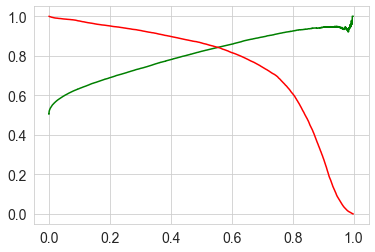

In [149]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### MAKING PREDICTIONS ON TEST DATA

In [150]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [151]:
X_test = X_test[X_train_lm.drop('const',axis=1).columns]

X_test.head()

arpu_7  onnet_mou_7  loc_og_mou_8  std_og_mou_8  loc_ic_t2m_mou_6  \
6102   0.2686       0.0025        0.0142        0.0024            0.0506   
2539   0.1038       0.0042        0.0018        0.0008            0.0003   
21576  0.3608       0.1033        0.4874        0.1024            0.3491   
19574  0.2432       0.0295        0.1652        0.0230            0.2358   
12804  0.2011       0.1741        0.0015        0.0037            0.2608   

       total_ic_mou_8  spl_ic_mou_8  total_rech_num_8  last_day_rch_amt_8  \
6102           0.0291        0.0000            0.0889              0.2549   
2539           0.0140        0.0000            0.1556              0.0000   
21576          0.2664        0.0000            0.1778              0.2301   
19574          0.1092        0.0000            0.5111              0.0531   
12804          0.0186        0.0000            0.0444              0.0000   

       av_rech_amt_data_7  vol_2g_mb_8  sep_vbc_3g  total_rech_data_diff  
6102               0.0000       0.0000      0.0000                0.5185  
2539               0.1637       0.1206      0.0000                0.3333  
21576              0.2505       0.0000      0.0000                0.3704  
19574              0.0000       0.0000      0.0000                0.5185  
12804              0.1692       0.0000      0.0000                0.3704

In [152]:
X_test.shape

(9001, 13)

In [153]:
X_test_sm = sm.add_constant(X_test)

In [154]:
y_test_pred = res.predict(X_test_sm)

In [155]:
y_test_pred[:10]

6102    0.7531
2539    0.6506
21576   0.0173
19574   0.1869
12804   0.9065
24030   0.0444
20273   0.1963
7538    0.1595
3196    0.1872
12935   0.3617
dtype: float64

In [156]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [157]:
# Let's see the head

y_pred_1.head()

0
6102  0.7531
2539  0.6506
21576 0.0173
19574 0.1869
12804 0.9065

In [158]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [159]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [160]:
y_pred_final.head()

churn      0
6102       1 0.7531
2539       1 0.6506
21576      0 0.0173
19574      0 0.1869
12804      1 0.9065

In [161]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_prob'})

In [162]:
y_pred_final.head()

churn  churn_prob
6102       1      0.7531
2539       1      0.6506
21576      0      0.0173
19574      0      0.1869
12804      1      0.9065

In [163]:
y_pred_final['final_predicted'] = y_pred_final.churn_prob.map(lambda x: 1 if x > 0.55 else 0)

In [164]:
y_pred_final.head()

churn  churn_prob  final_predicted
6102       1      0.7531                1
2539       1      0.6506                1
21576      0      0.0173                0
19574      0      0.1869                0
12804      1      0.9065                1

In [165]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8465726030441062

In [166]:
confusion3 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted)
confusion3

array([[7017, 1234],
       [ 147,  603]], dtype=int64)

In [167]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [168]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.804

In [169]:
# Let us calculate specificity

TN / float(TN+FP)

0.8504423706217428

In [170]:
precision_score(y_pred_final.churn, y_pred_final.final_predicted)

0.3282525857376157

In [171]:
recall_score(y_pred_final.churn, y_pred_final.final_predicted)

0.804

In [172]:
print("ROC-AUC Score:", "{:2.2}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.final_predicted)))

ROC-AUC Score: 0.83


****`INFERENCES BASED ON THE ABOVE MODEL`****

**TRAIN DATA**
- ****ROC-AUC Score = 0.91****
- ****Accuracy based on optimal cut off of 0.55 --> 84.2%****
- ****Sensitivity --> 84.4%****
- ****Specificity --> 84%****
- ****Precision --> 84.07%****
- ****Recall -->  84.41%****

**TEST DATA**
- ****ROC-AUC Score = 0.83****
- ****Accuracy based on optimal cut off of 0.55 --> 84.66%****
- ****Sensitivity --> 80.4%****
- ****Specificity --> 85%****
- ****Precision --> 32.8%****
- ****Recall -->  80.4%****

## Model 2: LOGISTIC REGRESSION WITH PCA

In [173]:
#splitting to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#balancing data with SMOTE

smt = SMOTE(random_state=42)
X_train_smt , y_train_smt = smt.fit_resample(X_train, y_train)

In [174]:
#importing PCA

from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [175]:
# apply PCA on train data which was obtained after SMOTE

pca.fit(X_train_smt)

PCA(random_state=100)

In [176]:
#fit transforming X_train_smt

X_train_pca = pca.fit_transform(X_train_smt)
X_train_pca.shape

(38618, 151)

In [177]:
#fit transforming X_test

X_test_pca = pca.transform(X_test)
X_test_pca.shape

(9001, 151)

In [178]:
#log reg with pca. fitting model 

logreg_pca = LogisticRegression(C=1e9)
logreg_pca.fit(X_train_pca, y_train_smt)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)

In [179]:
#confusion matrix and accuracy of the logistic regression model with PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model with PCA = ", accuracy_score(y_test, y_pred))


[[6465 1786]
 [ 124  626]]
Accuracy of the logistic regression model with PCA =  0.787801355404955


In [180]:
pca.explained_variance_ratio_

array([3.06483943e-01, 1.41491877e-01, 1.02532614e-01, 8.41244098e-02,
       7.26432237e-02, 5.63786082e-02, 3.62418506e-02, 2.74367241e-02,
       2.45393520e-02, 1.84476709e-02, 1.50847854e-02, 1.28295595e-02,
       1.21794163e-02, 1.04233439e-02, 1.00704081e-02, 7.13454553e-03,
       6.90242607e-03, 6.20538960e-03, 4.96865711e-03, 3.64283487e-03,
       3.37220410e-03, 3.14315901e-03, 3.00679645e-03, 2.77064626e-03,
       2.44926619e-03, 2.21626976e-03, 2.07231873e-03, 1.80512433e-03,
       1.61185512e-03, 1.42695931e-03, 1.40145769e-03, 1.31301303e-03,
       1.10576673e-03, 9.87372794e-04, 7.67733480e-04, 7.16206412e-04,
       7.00748605e-04, 6.07387932e-04, 5.71555201e-04, 5.31959331e-04,
       4.70989455e-04, 4.64079648e-04, 4.56365100e-04, 4.50075356e-04,
       4.35982558e-04, 4.13883082e-04, 3.95482721e-04, 3.57807597e-04,
       3.14145491e-04, 3.09983938e-04, 2.84170171e-04, 2.67878795e-04,
       2.49167220e-04, 2.35949374e-04, 2.23920388e-04, 2.12112798e-04,
      

In [181]:

#determining the pca components
df_pca = pd.DataFrame({'PCA-1':pca.components_[0],'PCA-2':pca.components_[1], 'PCA-3':pca.components_[2],'Feature':num_cols})
df_pca.head(10)

PCA-1   PCA-2   PCA-3         Feature
0 -0.0000  0.0000 -0.0000  loc_og_t2o_mou
1 -0.0000  0.0000 -0.0000  std_og_t2o_mou
2  0.0000 -0.0000 -0.0000  loc_ic_t2o_mou
3  0.1250  0.0498  0.0433          arpu_6
4  0.1406  0.1447  0.0191          arpu_7
5  0.0959  0.2377 -0.0408          arpu_8
6  0.1623 -0.0670  0.0591     onnet_mou_6
7  0.1726 -0.0035  0.0386     onnet_mou_7
8  0.1136  0.0725 -0.0136     onnet_mou_8
9  0.1852 -0.0126 -0.0212    offnet_mou_6

In [182]:
var_cumu = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var_cumu

array([30.65, 44.8 , 55.05, 63.46, 70.72, 76.36, 79.98, 82.72, 85.17,
       87.01, 88.52, 89.8 , 91.02, 92.06, 93.07, 93.78, 94.47, 95.09,
       95.59, 95.95, 96.29, 96.6 , 96.9 , 97.18, 97.42, 97.64, 97.85,
       98.03, 98.19, 98.33, 98.47, 98.6 , 98.71, 98.81, 98.89, 98.96,
       99.03, 99.09, 99.15, 99.2 , 99.25, 99.3 , 99.35, 99.4 , 99.44,
       99.48, 99.52, 99.56, 99.59, 99.62, 99.65, 99.68, 99.7 , 99.72,
       99.74, 99.76, 99.78, 99.8 , 99.81, 99.82, 99.83, 99.84, 99.85,
       99.86, 99.87, 99.88, 99.89, 99.9 , 99.91, 99.92, 99.93, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94,

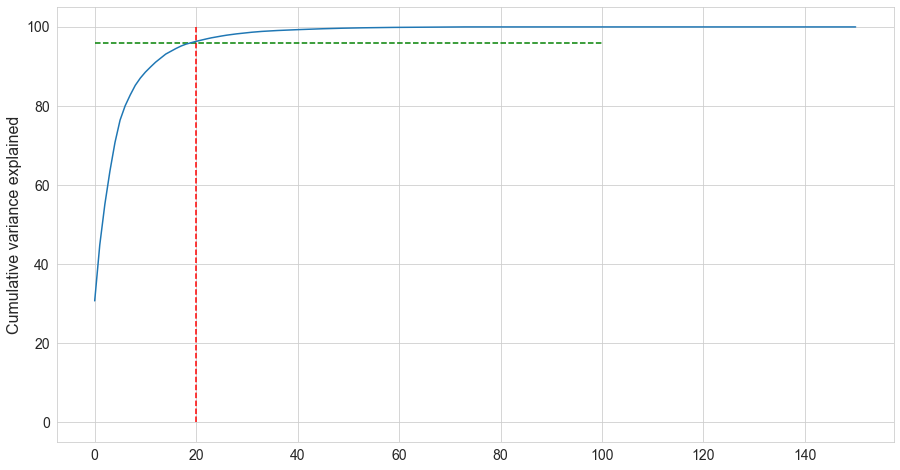

In [183]:
# plot to check the variance explained by different PCAs

fig = plt.figure(figsize = (15,8))
plt.vlines(x=20, ymax=100, ymin=0, colors="r", linestyles="--")
plt.hlines(y=96, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [184]:
# Applying PCA with 20 components; as 20 components explains more than 90% variance
pca_20 = PCA(n_components=20)

#tranforming X_train and X_test
X_train_pca20 = pca_20.fit_transform(X_train_smt)
print(X_train_pca20.shape)

X_test_pca20 = pca_20.transform(X_test)
print(X_test_pca20.shape)

(38618, 20)
(9001, 20)


In [185]:
# running LOGISTIC MODEL model with the selected variables

logreg_pca1 = LogisticRegression(C=1e9)
logreg_pca1.fit(X_train_pca20, y_train_smt)

# predicting probabilities
y_pred20 = logreg_pca1.predict(X_test_pca20)

# Converting y_pred to a dataframe
df_y_pred = pd.DataFrame(y_pred20)

#checking the accuracy
print("Accuracy score of log. regression with pca = " , accuracy_score(y_test,y_pred20))

Accuracy score of log. regression with pca =  0.8009110098877903


In [186]:
#checking for the confusion matrix
print(confusion_matrix(y_test,y_pred20))

[[6600 1651]
 [ 141  609]]


In [187]:
print("ROC-AUC Score:", "{:2.2}".format(metrics.roc_auc_score(y_test, y_pred20)))

ROC-AUC Score: 0.81


- ****`above logistic regression model gives an accuracy score of 80% with 20 features in 90% variance`****

# Model 3: DECISION TREE CLASSIFIER - WITH PCA

In [188]:
# Importing decision tree classifier from sklearn library

from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters

dt_df = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

dt_df.fit(X_train_pca20, y_train_smt) #using balanced samples / pca applied

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [189]:
# checking the evaluation metrics of our default model

# Making predictions

y_pred_dt = dt_df.predict(X_test_pca20)

# Printing the classification_report,confusion_matrix, accuracy_score

print(classification_report(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

print('Accuracy Score = ', accuracy_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      8251
           1       0.32      0.69      0.44       750

    accuracy                           0.85      9001
   macro avg       0.64      0.78      0.67      9001
weighted avg       0.91      0.85      0.87      9001

[[7140 1111]
 [ 232  518]]
Accuracy Score =  0.8507943561826464


In [190]:
#Creating the confusion Matrix

confusion4 = confusion_matrix(y_test,y_pred_dt)

TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_dt))

# sensitivity 
print('Sensitivity: ', TP / float(TP+FN))

# specificity
print('Specificity: ',TN / float(TN+FP))

# false postive rate 
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))


Acuracy Score 0.8507943561826464
Sensitivity:  0.6906666666666667
Specificity:  0.8653496545873227
false postive rate:  0.13465034541267726
positive predictive value:  0.3179864947820749
Negative predictive value:  0.9685295713510581


### HYPER PARAMETER TUNING

In [191]:
# Importing GridSearchCV to find optimal max_depth

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specifying the number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiating the model
dec_tree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dec_tree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")

tree.fit(X_train_pca20, y_train_smt)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [192]:
# checking the scores of GridSearch CV
                            
results = tree.cv_results_
pd.DataFrame(results).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.1076        0.0035           0.0063          0.0077   
1         0.1976        0.0130           0.0006          0.0008   
2         0.2746        0.0089           0.0035          0.0061   
3         0.3472        0.0061           0.0062          0.0077   
4         0.4288        0.0052           0.0035          0.0061   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}             0.7284             0.7339   
1               2  {'max_depth': 2}             0.7284             0.7371   
2               3  {'max_depth': 3}             0.7565             0.7595   
3               4  {'max_depth': 4}             0.7837             0.7895   
4               5  {'max_depth': 5}             0.7917             0.8068   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0             0.7399             0.7303             0.7232           0.7311   
1             0.7399             0.7303             0.7232           0.7318   
2             0.7721             0.7573             0.7564           0.7604   
3             0.7961             0.7856             0.7764           0.7862   
4             0.8041             0.7968             0.7895           0.7978   

   std_test_score  rank_test_score  
0          0.0056               39  
1          0.0060               38  
2          0.0060               37  
3          0.0065               36  
4          0.0068               35

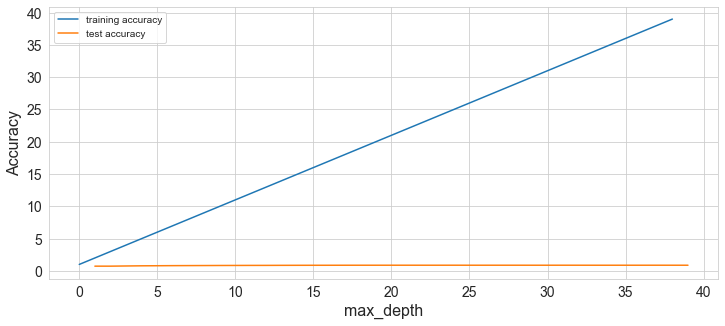

In [193]:
# plotting accuracies with max_depth

plt.figure(figsize=(12,5))
plt.plot(results["param_max_depth"], label="training accuracy")
plt.plot(results["param_max_depth"], results["mean_test_score"],label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [194]:
# Creating the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca20, y_train_smt)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.4min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [195]:
# Calculating the cv results
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res

# printing the optimal accuracy score and hyperparameters
print("Best Accuracy = ", grid_search.best_score_)

Best Accuracy =  0.8291468555223849


In [196]:
#prtinting the best estimator

print(grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=25,
                       min_samples_split=50)


In [197]:
# model with optimal hyperparameters

best_model = DecisionTreeClassifier(criterion = "entropy",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)

best_model.fit(X_train_pca20, y_train_smt) #using the dataset obtained after pca and smote // balanced data

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=25, min_samples_split=50,
                       random_state=100)

In [198]:
#predicting
y_pred_res = best_model.predict(X_test_pca20)

#confusion matrix
confusion5=confusion_matrix(y_test, y_pred_res)
confusion5

array([[7146, 1105],
       [ 248,  502]], dtype=int64)

In [199]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_res))

# sensitivity 
print('Sensitivity: ', TP / float(TP+FN))

# specificity
print('Specificity: ',TN / float(TN+FP))

# false postive rate
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

# Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.8496833685146095
Sensitivity:  0.6693333333333333
Specificity:  0.8660768391710095
false postive rate:  0.13392316082899042
positive predictive value:  0.3123833229620411
Negative predictive value:  0.9664592913172843
Misclassification Rate:  0.1503166314853905


In [200]:
print("ROC-AUC Score:", "{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_res)))

ROC-AUC Score: 0.77


# Model 4: RANDOM FOREST WITH PCA

In [201]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_4_rf = RandomForestClassifier()
model_4_rf.fit(X_train_pca20, y_train_smt) #using balanced smote samples with pca

# Make predictions
test_pred = model_4_rf.predict(X_test_pca20)
print ('Randon Forest Accuracy with Default Hyperparameter = ',metrics.accuracy_score(y_test, test_pred))

Randon Forest Accuracy with Default Hyperparameter =  0.9096767025886012


In [202]:
#printing the classification report

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8251
           1       0.47      0.58      0.52       750

    accuracy                           0.91      9001
   macro avg       0.71      0.76      0.73      9001
weighted avg       0.92      0.91      0.91      9001



In [203]:
#printing confusion matrix
print(confusion_matrix(y_test, test_pred))

[[7751  500]
 [ 313  437]]


In [204]:
#HYPER PARAMETER TUNING

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)

rf.fit(X_train_pca20, y_train_smt)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [205]:
# scores of GridSearch CV

res = rf.cv_results_
pd.DataFrame(res).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         2.6833        0.0091           0.0562          0.0077   
1         7.4288        0.0356           0.0875          0.0077   
2        11.0248        0.1151           0.1351          0.0068   
3        13.0623        0.1020           0.1594          0.0062   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}             0.7440             0.7544   
1               7   {'max_depth': 7}             0.8305             0.8269   
2              12  {'max_depth': 12}             0.9010             0.8995   
3              17  {'max_depth': 17}             0.9430             0.9297   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0             0.7567             0.7505             0.7428           0.7497   
1             0.8300             0.8297             0.8233           0.8281   
2             0.8973             0.8942             0.8937           0.8971   
3             0.9323             0.9277             0.9262           0.9318   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0          0.0055                4              0.7481              0.7530   
1          0.0027                3              0.8431              0.8385   
2          0.0029                2              0.9354              0.9351   
3          0.0060                1              0.9888              0.9871   

   split2_train_score  split3_train_score  split4_train_score  \
0              0.7521              0.7505              0.7516   
1              0.8395              0.8434              0.8425   
2              0.9336              0.9363              0.9370   
3              0.9883              0.9872              0.9882   

   mean_train_score  std_train_score  
0            0.7511           0.0017  
1            0.8414           0.0020  
2            0.9355           0.0011  
3            0.9879           0.0007

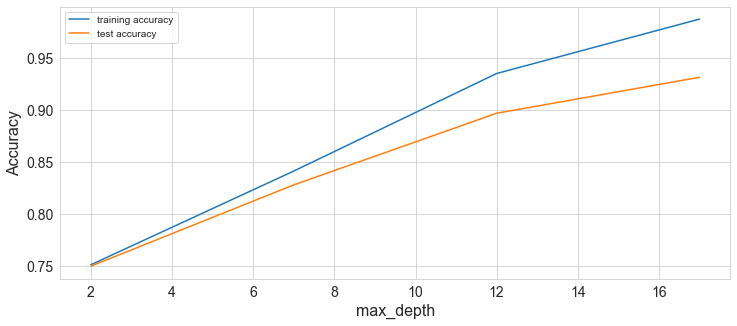

In [206]:
# plotting accuracies with max_depth

plt.figure(figsize=(12,5))
plt.plot(res["param_max_depth"], 
         res["mean_train_score"], 
         label="training accuracy")
plt.plot(res["param_max_depth"], 
         res["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [207]:
#Tuning n_estimators
# specifying number of folds for k-fold CV

n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 200, 50)}

# instantiating the model 
rf = RandomForestClassifier(max_depth=4)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)

rf.fit(X_train_pca20, y_train_smt)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(50, 200, 50)},
             return_train_score=True, scoring='accuracy')

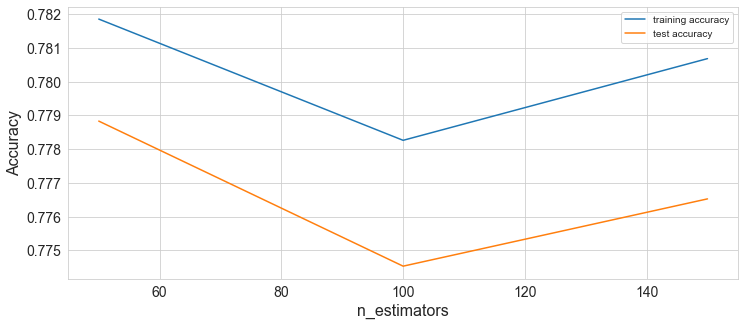

In [208]:
#scores of GridSearch CV
res = rf.cv_results_

# plotting accuracies with n_estimators
plt.figure(figsize=(12,5))
plt.plot(res["param_n_estimators"], 
         res["mean_train_score"], 
         label="training accuracy")
plt.plot(res["param_n_estimators"], 
         res["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [209]:
#tuning sample leaf

# specifying number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(30, 200, 50)}

# instantiating the model
rf = RandomForestClassifier()

# fitting the tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)

rf.fit(X_train_pca20, y_train_smt)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(30, 200, 50)},
             return_train_score=True, scoring='accuracy')

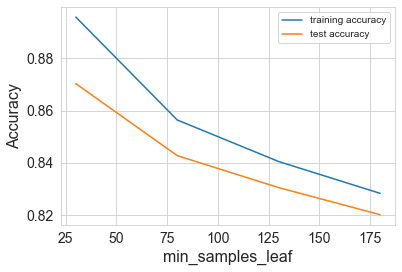

In [210]:
# scores of GridSearch CV
res = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(res["param_min_samples_leaf"], 
         res["mean_train_score"], 
         label="training accuracy")
plt.plot(res["param_min_samples_leaf"], 
         res["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [211]:
#tuning sample split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 100)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)

rf.fit(X_train_pca20, y_train_smt)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(100, 500, 100)},
             return_train_score=True, scoring='accuracy')

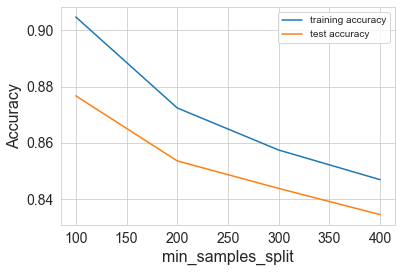

In [212]:
# scores of GridSearch CV
res = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(res["param_min_samples_split"], 
         res["mean_train_score"], 
         label="training accuracy")
plt.plot(res["param_min_samples_split"], 
         res["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [213]:
# Creating the parameter grid based on the results of random search 

parameter_grid = {
    'max_depth': [2,20,5],
    'min_samples_leaf': range(30, 200, 50),
    'min_samples_split': range(100, 500, 100),
    'n_estimators': [50,200,50], 
    'max_features': [10,20,25]
}

# Creating a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = parameter_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

In [214]:
# Fit the grid search to the data
grid_search.fit(X_train_pca20, y_train_smt)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 321.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 337.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 537.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 582.2min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 605.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 20, 5], 'max_features': [10, 20, 25],
                         'min_samples_leaf': range(30, 200, 50),
                         'min_samples_split': range(100, 500, 100),
                         'n_estimators': [50, 200, 50]},
             verbose=1)

In [215]:
# Calculating the cv results
cv_res = pd.DataFrame(grid_search.cv_results_)
print(cv_res)

# printing the optimal accuracy score and hyperparameters
print("Best Accuracy = ", grid_search.best_score_)

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           5.3808        0.0275           0.0506          0.0061   
1          21.5510        0.1731           0.1846          0.0064   
2           5.4410        0.0532           0.0506          0.0060   
3           5.4020        0.0452           0.0493          0.0023   
4          21.6533        0.2713           0.1943          0.0076   
5           5.5504        0.1995           0.0510          0.0023   
6           5.4841        0.1491           0.0512          0.0043   
7          21.4835        0.1569           0.1916          0.0052   
8           5.4243        0.0478           0.0487          0.0019   
9           5.4330        0.0344           0.0483          0.0024   
10         21.5907        0.1934           0.1842          0.0062   
11          5.3994        0.0341           0.0511          0.0047   
12          5.4038        0.0572           0.0531          0.0077   
13         21.4419        0.1658  

In [216]:
#prtinting the best estimator

print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=20, max_features=10, min_samples_leaf=30,
                       min_samples_split=100, n_estimators=200)


In [217]:
model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=20,
                                  min_samples_leaf=30, 
                                  min_samples_split=100,
                                  n_estimators=200 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 10,
                                  max_leaf_nodes = 30)

model_rf.fit(X_train_pca20, y_train_smt)

# Make predictions
test_pred = model_rf.predict(X_test_pca20)

In [218]:
# calculating evaluation metrics

print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      8251
           1       0.30      0.76      0.43       750

    accuracy                           0.83      9001
   macro avg       0.64      0.80      0.66      9001
weighted avg       0.92      0.83      0.86      9001

[[6897 1354]
 [ 181  569]]


In [219]:
#oob score
model_rf.oob_score_

0.817831063234761

In [220]:
#calculating the accuracy score

print ('Accuracy Score for Random Forest:',metrics.accuracy_score(y_test, test_pred))

Accuracy Score for Random Forest: 0.8294633929563382


In [221]:
print("ROC-AUC Score:", "{:2.2}".format(metrics.roc_auc_score(y_test, test_pred)))

ROC-AUC Score: 0.8


`company should focus more on the below features`
1. arpu_7	
2. onnet_mou_7	
3. loc_og_mou_8
4. std_og_mou_8
5. loc_ic_t2m_mou_6
6. total_ic_mou_8
7. spl_ic_mou_8
8. total_rech_num_8
9. last_day_rch_amt_8
10. av_rech_amt_data_7
11. vol_2g_mb_8	
12. sep_vbc_3g
13. total_rech_data_diff